
BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Problem Statement: Business Use Case There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

You are provided with following 2 files:

train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.



Dataset Attributes Here is the description of all the variables :

Variable: Definition ID: Unique client ID age: Age of the client job: Type of job marital: Marital status of the client education: Education level default: Credit in default. housing: Housing loan loan: Personal loan contact: Type of communication month: Contact month day_of_week: Day of week of contact duration: Contact duration campaign: number of contacts performed during this campaign to the client pdays: number of days that passed by after the client was last contacted previous: number of contacts performed before this campaign poutcome: outcome of the previous marketing campaign Output variable (desired target): Subscribed (target): has the client subscribed a term deposit? (YES/NO)

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("termdeposit_train.csv")
df



,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 31647
No. of Columns : 18


In [4]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']}

In [5]:
# Observations:

# There are int and object data types available in the dataset

In [6]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

object    10
int64      8
dtype: int64

In [7]:
# Observations:

# No. of object datatypes: 10

# No. of int datatypes: 8

# Data Integrity Check

In [8]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [9]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [10]:
df.duplicated().sum()

0

In [11]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [12]:
# Observations:

# No duplicate values present in the dataframe

# Start with Enlisting Value counts & Sub-categories of different categorial features available


In [13]:
df_categorical=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

for i in df_categorical:
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    print('\033[1m'+i,'"Values Count"'+'\033[0m')
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*100)

job "Values Count"


,Value,Count,% Count
0,blue-collar,6842,21.6
1,management,6639,21.0
2,technician,5307,16.8
3,admin.,3631,11.5
4,services,2903,9.2
5,retired,1574,5.0
6,self-employed,1123,3.5
7,entrepreneur,1008,3.2
8,unemployed,905,2.9
9,housemaid,874,2.8


marital "Values Count"


,Value,Count,% Count
0,married,19095,60.3
1,single,8922,28.2
2,divorced,3630,11.5


education "Values Count"


,Value,Count,% Count
0,secondary,16224,51.3
1,tertiary,9301,29.4
2,primary,4808,15.2
3,unknown,1314,4.2


default "Values Count"


,Value,Count,% Count
0,no,31062,98.2
1,yes,585,1.8


housing "Values Count"


,Value,Count,% Count
0,yes,17584,55.6
1,no,14063,44.4


loan "Values Count"


,Value,Count,% Count
0,no,26516,83.8
1,yes,5131,16.2


contact "Values Count"


,Value,Count,% Count
0,cellular,20423,64.5
1,unknown,9177,29.0
2,telephone,2047,6.5


month "Values Count"


,Value,Count,% Count
0,may,9669,30.6
1,jul,4844,15.3
2,aug,4333,13.7
3,jun,3738,11.8
4,nov,2783,8.8
5,apr,2055,6.5
6,feb,1827,5.8
7,jan,977,3.1
8,oct,512,1.6
9,sep,410,1.3


poutcome "Values Count"


,Value,Count,% Count
0,unknown,25929,81.9
1,failure,3362,10.6
2,other,1288,4.1
3,success,1068,3.4


subscribed "Values Count"


,Value,Count,% Count
0,no,27932,88.3
1,yes,3715,11.7


In [14]:
# Observations:

# Columns "job"(0.7%), "education"(4.2%),"contact"(29.0%),"poutcome" (81.9%) have unknown values

# I am going to drop column "poutcome" as 81.9% data is "unknown" hence it will not contribute to model learning

# I am going to replace "unknown" values Nan in columns "job", "education" and "contact" 
#and will address them per null values handling

In [15]:
# Dropping column "poutcome" as it contains 81.9% unknown data 
df.drop(["poutcome"],axis=1,inplace=True)

In [16]:
# Replacing unknown values in columns "job", "education" and "contact" with Nan
df["job"]=df["job"].replace("unknown",np.nan) 
df["education"]=df["education"].replace("unknown",np.nan)
df["contact"]=df["contact"].replace("unknown",np.nan)

In [17]:
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,26110,56,admin.,married,NaN,no,1933,no,no,telephone,19,nov,44,2,-1,0,no
1,40576,31,NaN,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,no


# Null Values Handling

In [18]:
# Checking the sum of null values for all columns

df.isnull().sum().sum()

10697

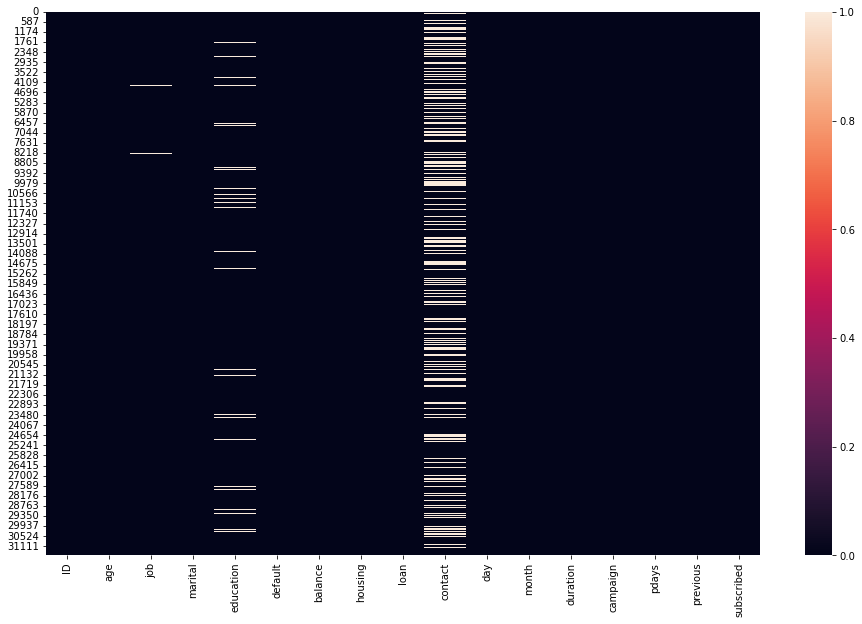

In [19]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [20]:
#Finding the percentage of data missing from the dataset
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
df_null=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null.sort_values(by=["% Missing data"],ascending=False)


Missing Values


,Data Type,Missing Values,% Missing data
contact,object,9177,29.0
education,object,1314,4.2
job,object,206,0.7
ID,int64,0,0.0
day,int64,0,0.0
previous,int64,0,0.0
pdays,int64,0,0.0
campaign,int64,0,0.0
duration,int64,0,0.0
month,object,0,0.0


In [21]:
# Observation:

# Null values are present in "job", "education" and "contact" columns.

# As the data is categorical in nature, I will use 'mode' to replace null values.

#  Missing Values Imputation


In [22]:

# Filling null values of column with categorical data with first value of 'mode'
for i in df.columns:
    if (df[i].dtype=='O' and df[i].isnull().sum()!=0):
        df[i]=df[i].fillna(df[i].mode()[0])

print(df.isnull().sum().sum())

0


In [23]:
df.head(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,26110,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,no
1,40576,31,blue-collar,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,no


# Segregating columns based on data type for better EDA

In [24]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'subscribed']}

In [25]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype=='int64']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df_numerical=df[numerical]

There are 8 numerical variables

The numerical variables are : ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [26]:
# Dropping unneccessary column 'ID' as it will not contribute to model learning
df_numerical.drop(['ID'],axis=1,inplace=True)
df.drop(['ID'],axis=1,inplace=True)

In [27]:
# Find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='object']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df_categorical=df[categorical]

There are 9 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'subscribed']


In [28]:
y=df["subscribed"]
y.head()

0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: object

# Statistical Summary:

In [29]:
# Statistical summary for numerical data
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [30]:
#Observations:

# count is same for all the columns.Hence,there are no null values

# I feel there is some skewness in data. Will check later using graphs

# standard deviation is very high for balance,duration,pdays.This shows high spread of data i.e, range is high

# large difference between 75% and max for columns age,balance,duration,campaign,pdays and previous.
#so,this indicates the presence of outliers

In [31]:
df_categorical.describe(include='O').T

,count,unique,top,freq
job,31647,11,blue-collar,7048
marital,31647,3,married,19095
education,31647,3,secondary,17538
default,31647,2,no,31062
housing,31647,2,yes,17584
loan,31647,2,no,26516
contact,31647,2,cellular,29600
month,31647,12,may,9669
subscribed,31647,2,no,27932


In [32]:
# Observations:

# count is same for all the columns.so,no null values are present

# unique shows the uniqueness present in each column

# Top indicates the mode of each column like blue-collar is mode for job column,married is mode for marital,
#secondary is mode for education column and so on.

# Visualization of data

# Univariate Graphical Analysis for Categorical data

In [33]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'subscribed']}

In [34]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()


object    9
int64     7
dtype: int64

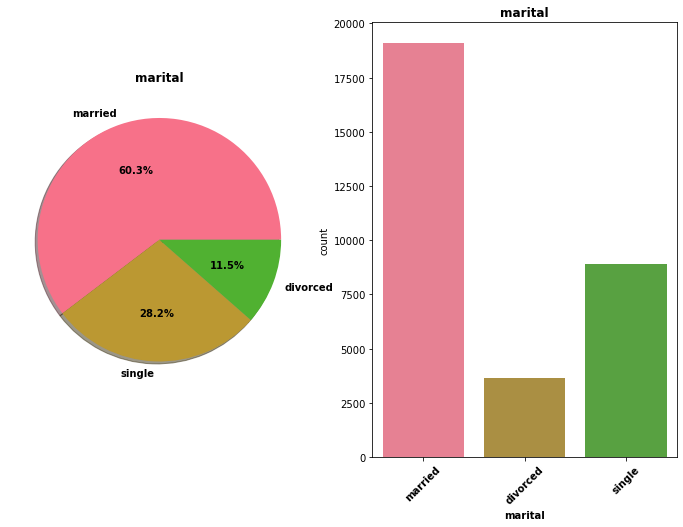

**Observations for marital :**

,Value,Count,% Count
0,married,19095,60.3
1,single,8922,28.2
2,divorced,3630,11.5


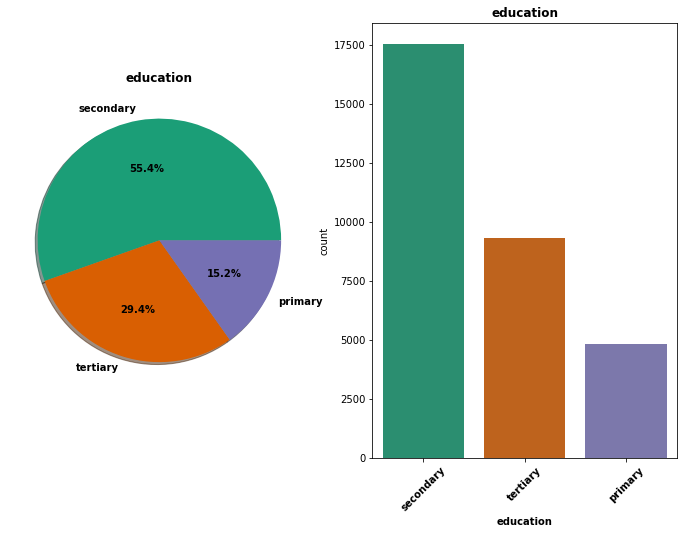

**Observations for education :**

,Value,Count,% Count
0,secondary,17538,55.4
1,tertiary,9301,29.4
2,primary,4808,15.2


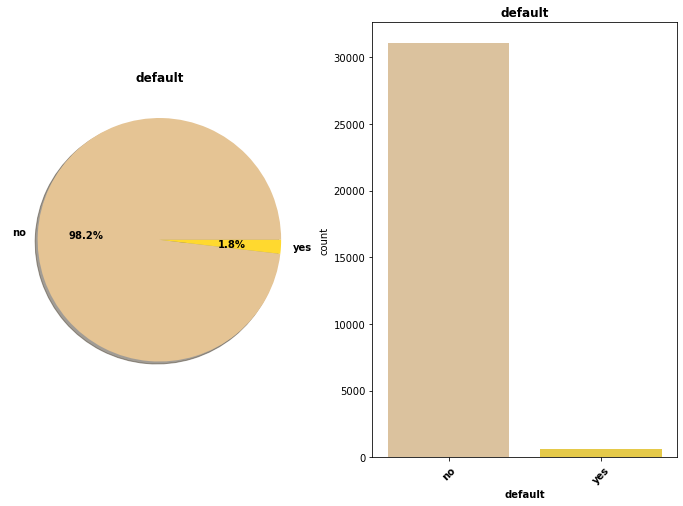

**Observations for default :**

,Value,Count,% Count
0,no,31062,98.2
1,yes,585,1.8


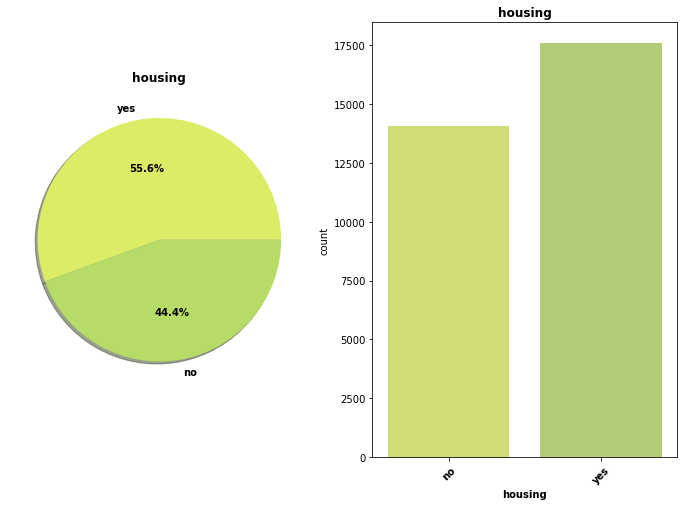

**Observations for housing :**

,Value,Count,% Count
0,yes,17584,55.6
1,no,14063,44.4


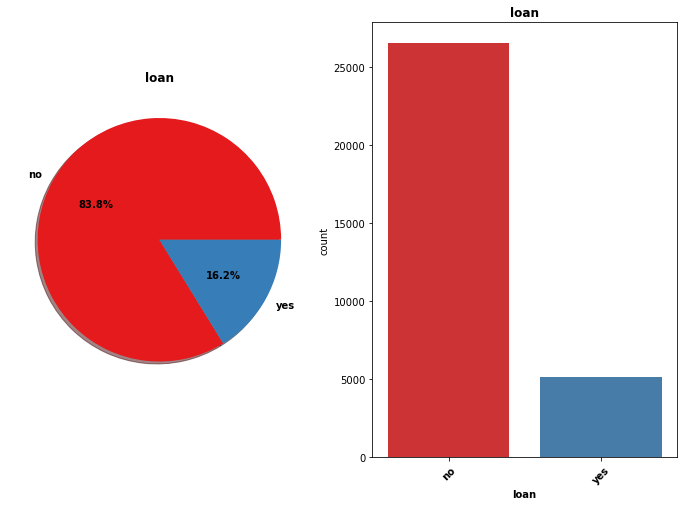

**Observations for loan :**

,Value,Count,% Count
0,no,26516,83.8
1,yes,5131,16.2


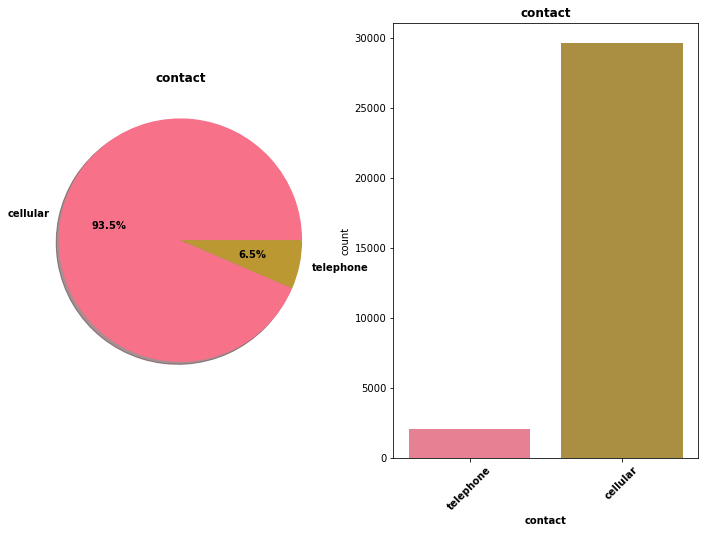

**Observations for contact :**

,Value,Count,% Count
0,cellular,29600,93.5
1,telephone,2047,6.5


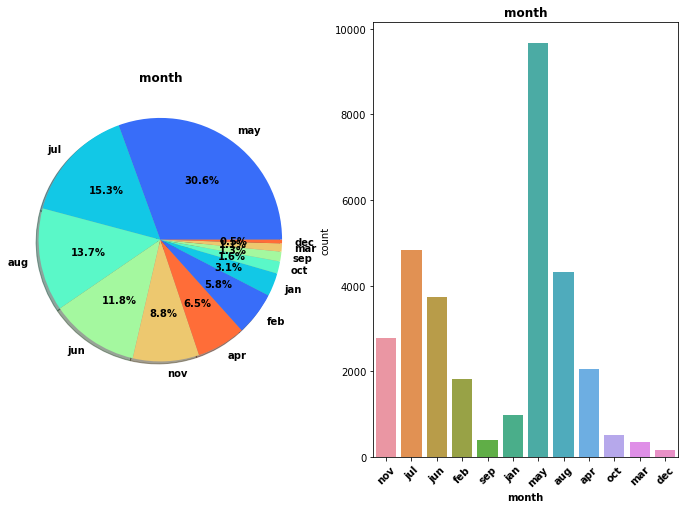

**Observations for month :**

,Value,Count,% Count
0,may,9669,30.6
1,jul,4844,15.3
2,aug,4333,13.7
3,jun,3738,11.8
4,nov,2783,8.8
5,apr,2055,6.5
6,feb,1827,5.8
7,jan,977,3.1
8,oct,512,1.6
9,sep,410,1.3


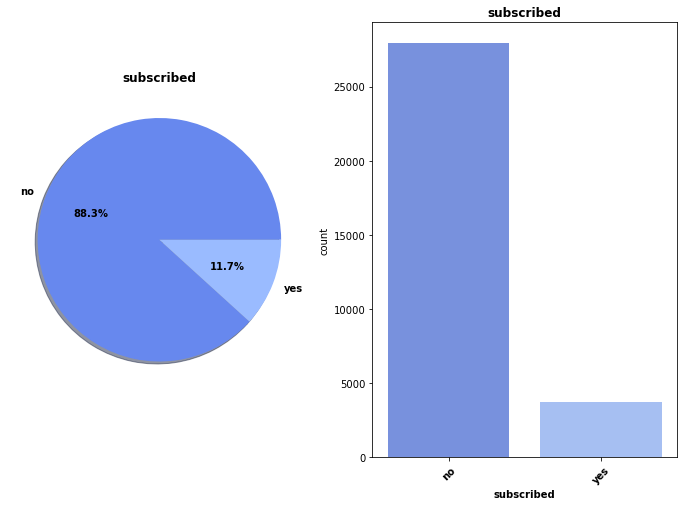

**Observations for subscribed :**

,Value,Count,% Count
0,no,27932,88.3
1,yes,3715,11.7


In [35]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r']

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

plotnumber =1
for i in df_categorical.columns[1:42]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=9:
        f,ax=plt.subplots(1,2,figsize=(12,8))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight ='bold')
        ax[1].set_xlabel(i,fontsize=10,fontweight ='bold')
        plt.xticks(fontsize=10,fontweight ='bold',rotation=45)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    printmd("**Observations for {} :**".format(i))   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

# Univariate Graphical Analysis for Numerical data

Minimum age is 18 and Maximum age is 95
Minimum balance is -8019 and Maximum balance is 102127


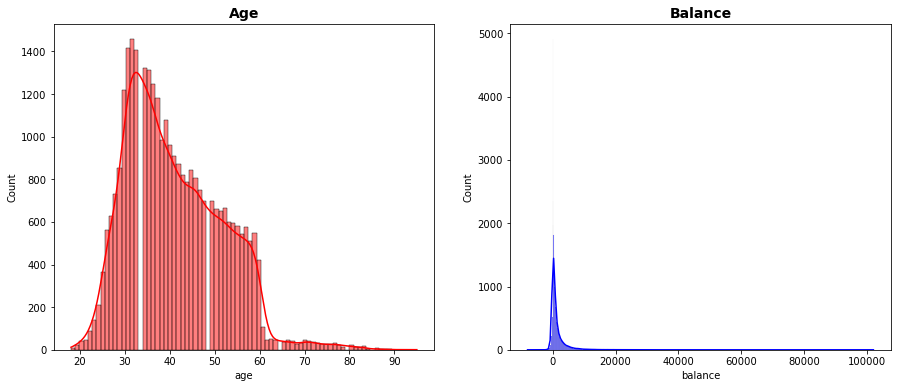

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df_numerical['age'],kde=True,color='r')
plt.title('Age',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df_numerical['balance'],kde=True,color='b')
plt.title('Balance',fontsize=14, fontweight='bold')
print('Minimum age is {} and Maximum age is {}'.format(df_numerical['age'].min(),df_numerical['age'].max()))
print('Minimum balance is {} and Maximum balance is {}'.format(df_numerical['balance'].min(),df_numerical['balance'].max()))
plt.show()

In [37]:
# Observations:

# Both the columns are not normally distributed and there is skweness

# Std deviation is high for age where as it is small for balance

Minimum day is 1 and Maximum day is 31
Minimum duration is 0 and Maximum duration is 4918


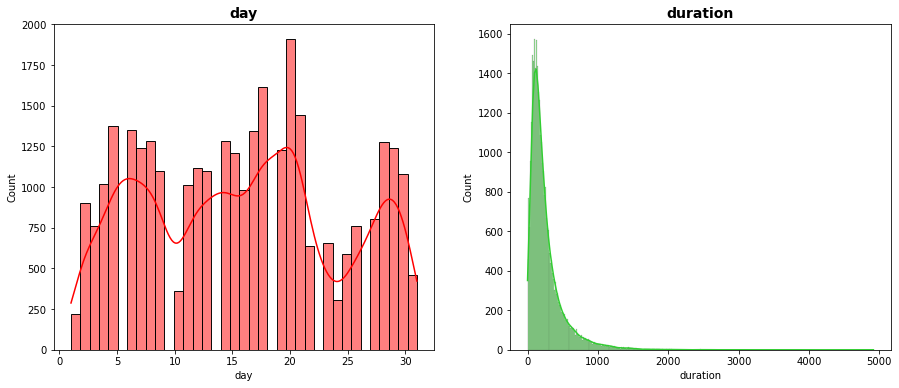

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df_numerical['day'],kde=True,color='r')
plt.title('day',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df_numerical['duration'],kde=True,color='limegreen')
plt.title('duration',fontsize=14, fontweight='bold')
print('Minimum day is {} and Maximum day is {}'.format(df_numerical['day'].min(),df_numerical['day'].max()))
print('Minimum duration is {} and Maximum duration is {}'.format(df_numerical['duration'].min(),df_numerical['duration'].max()))
plt.show()

In [39]:
# Observations:

# Both the columns are not normally distributed and there is skweness

# Std deviation is high for 'day' where as it is small for 'duration'

Minimum number of contacts performed during this campaign to the client is 1 and Maximum number of contacts performed during this campaign to the client is 63
Minimum number of days that passed by after the client was last contacted is -1 and Maximum number of days that passed by after the client was last contacted is 871


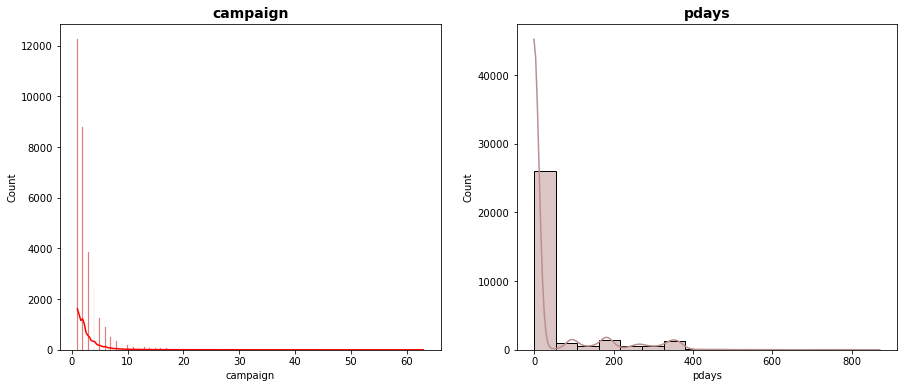

In [40]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df_numerical['campaign'],kde=True,color='r')
plt.title('campaign',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df_numerical['pdays'],kde=True,color='rosybrown')
plt.title('pdays',fontsize=14, fontweight='bold')
print('Minimum number of contacts performed during this campaign to the client is {} and Maximum number of contacts performed during this campaign to the client is {}'.format(df_numerical['campaign'].min(),df_numerical['campaign'].max()))
print('Minimum number of days that passed by after the client was last contacted is {} and Maximum number of days that passed by after the client was last contacted is {}'.format(df_numerical['pdays'].min(),df_numerical['pdays'].max()))
plt.show()

In [41]:
# Observations:

# Both the columns are not normally distributed and there is skweness

# Both are having right skewed data

Minimum number of contacts performed before this campaign is 0 and Maximum number of contacts performed before this campaign is 275


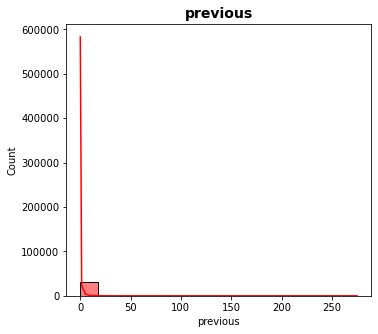

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_numerical['previous'],kde=True,color='r')
plt.title('previous',fontsize=14, fontweight='bold')
print('Minimum number of contacts performed before this campaign is {} and Maximum number of contacts performed before this campaign is {}'.format(df_numerical['previous'].min(),df_numerical['previous'].max()))
plt.show()

In [43]:
# Observations:

# "previous" column is not normally distributed.

# It is having right skewed data


# Bivariate Graphical Analysis for categorical data

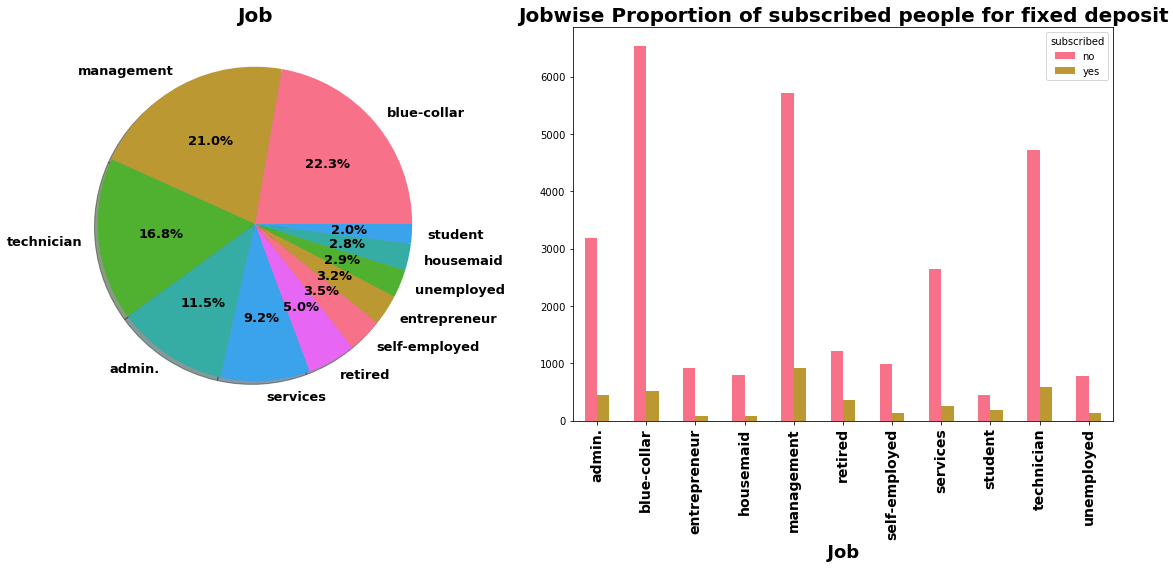

In [44]:
# Job with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['job'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Job', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df_categorical['job'], df_categorical['subscribed'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Jobwise Proportion of subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Job ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()

In [45]:
# Observations:

# Customers who have job in "management" have more FD subscriptions

# Customers who have job in "blue-collar" have least FD subscriptions

# Interestingly, % of people are high who didn't opt for FD subscription in all job categories

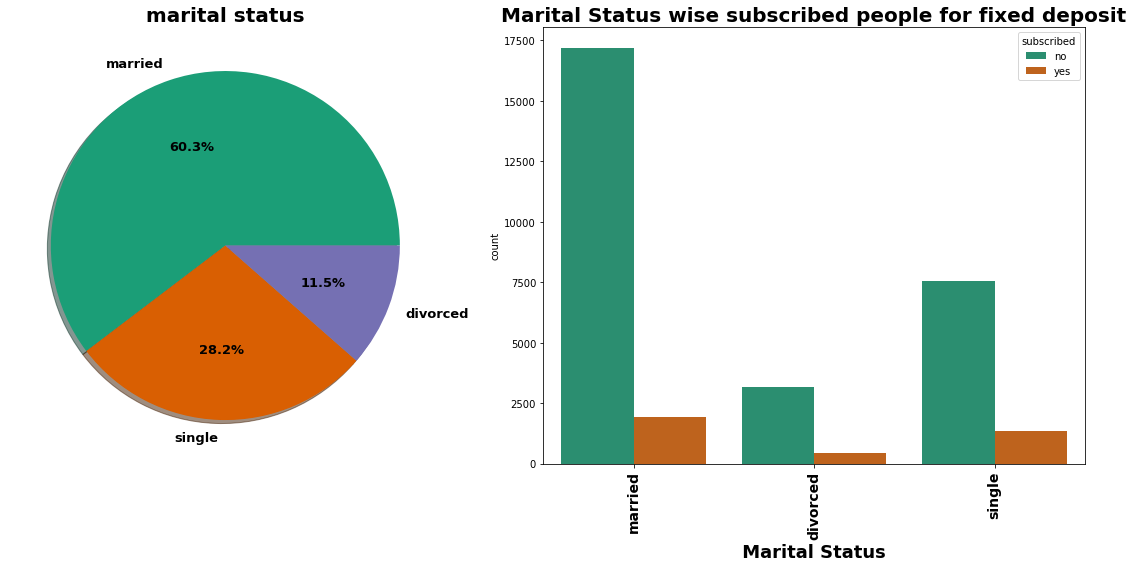

In [46]:
# Marital Status with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['marital'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('marital status', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('marital',hue="subscribed",data=df_categorical,ax=ax[1])
ax[1].set_title('Marital Status wise subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Marital Status ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()


In [47]:
# Observations:

# Married people have more FD subscriptions as well as least FD subscriptions

# Interestingly, % of people are high who didn't opt for FD subscription in all categories


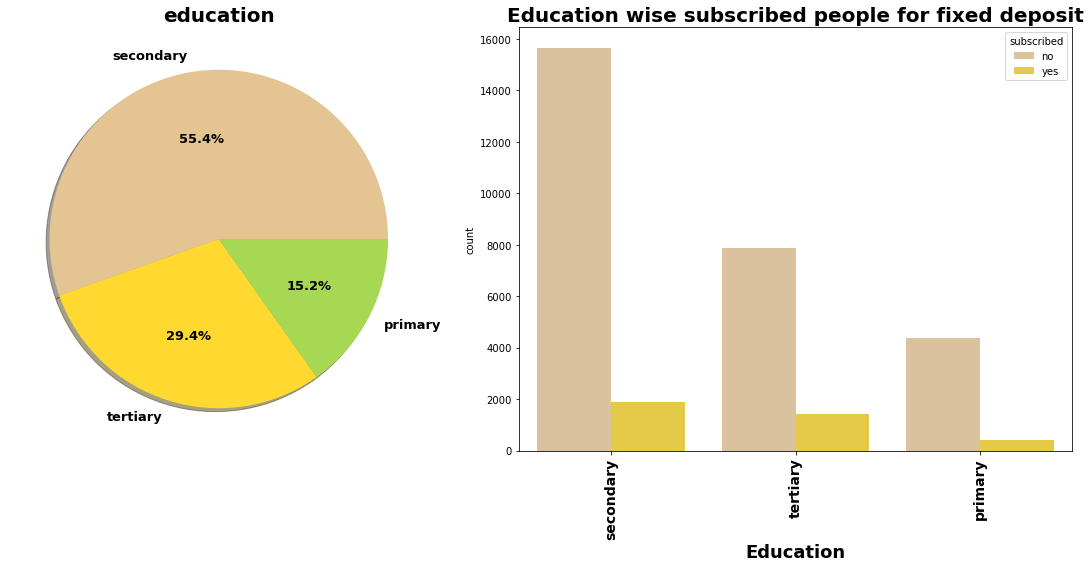

In [48]:
# Education with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['education'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('education',hue="subscribed",data=df_categorical,ax=ax[1])
ax[1].set_title('Education wise subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()


In [49]:
# Observations:

# People with secondary education have more FD subscriptions
#at the same time there are more number of people with secondary education who didn't opt for FD


# Interestingly, % of people are high who didn't opt for FD subscription in all categories

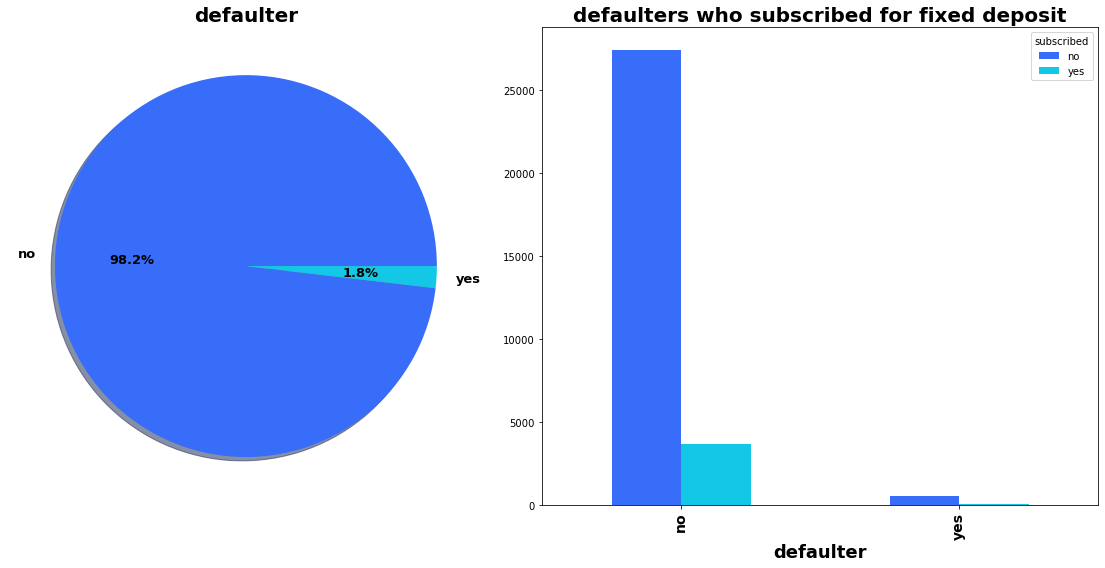

In [50]:
# Defaulter with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['default'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('defaulter', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
table = pd.crosstab(df_categorical['default'], df_categorical['subscribed'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('defaulters who subscribed for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("defaulter",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()

In [51]:
# Observations:

# Non-defaulters have more FD subscriptions; 
#at the same time there are more number of non-defaulters who didn't opt for FD
# This could be due to more %non-defaulters in the entire dataset

# Interestingly, % of people are high who didn't opt for FD subscription in all categories

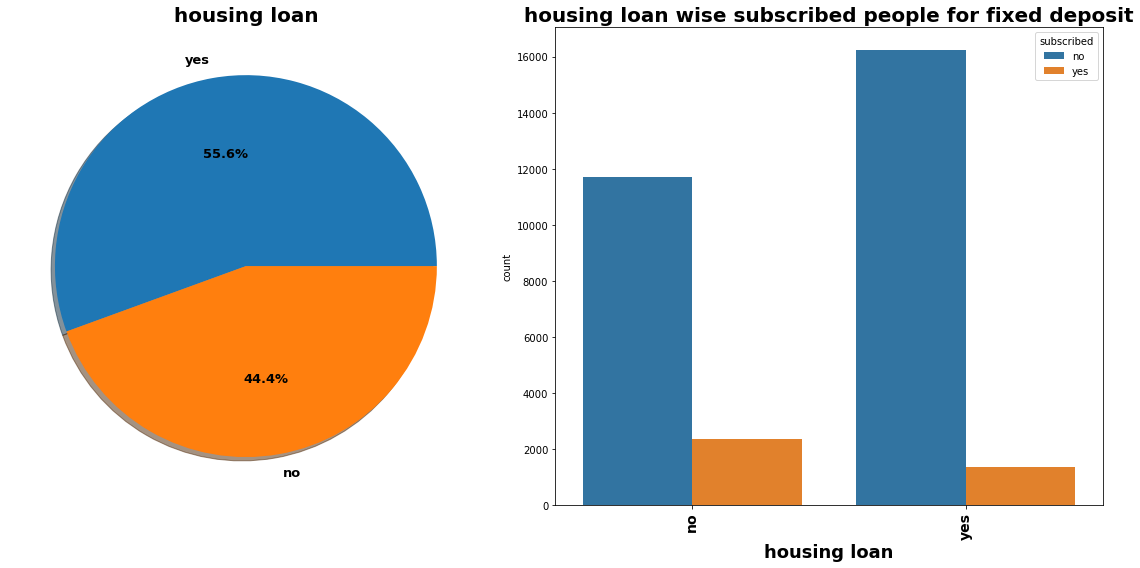

In [52]:
# Housing Loan with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['housing'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('housing loan', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('housing',hue="subscribed",data=df_categorical,ax=ax[1])
ax[1].set_title('housing loan wise subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("housing loan",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()

In [53]:
# Observations:

# There are almost equal %of housing loan customers in both yes and no categories

# The customers who have not opted for housing loan have taken more FD subscriptions

# The customers who have opted for housing loan have not taken more FD subscriptions

# Interestingly, % of people are high who didn't opt for FD subscription in all categories

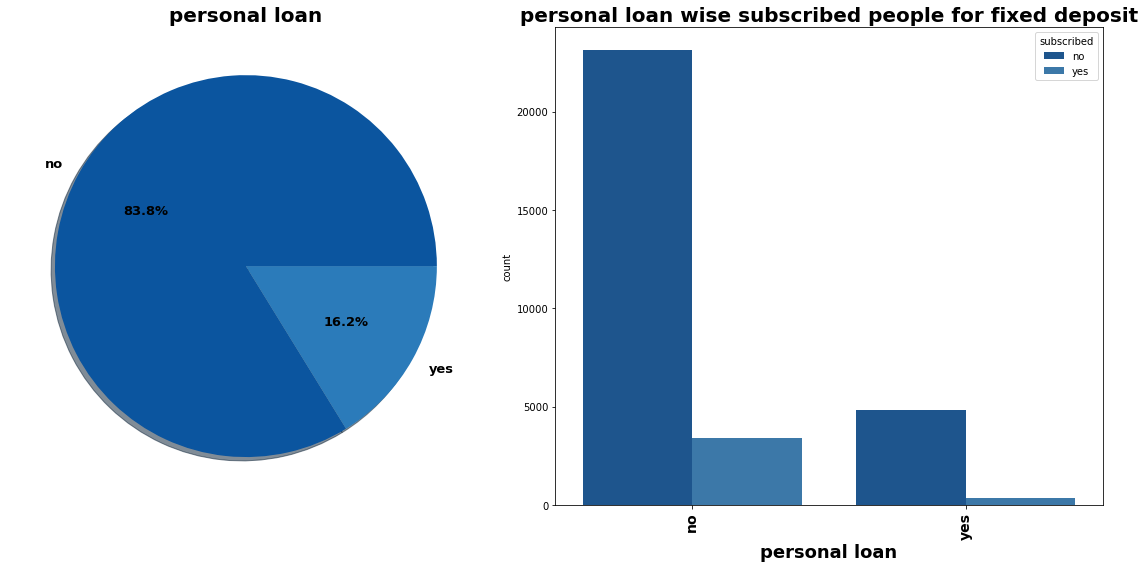

In [54]:
# Personal Loan with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Blues_r')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['loan'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('personal loan', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('loan',hue="subscribed",data=df_categorical,ax=ax[1])
ax[1].set_title('personal loan wise subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("personal loan",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()

In [55]:
# Observations:

# The customers who have not taken personal loan have opted more for FD subscription

# Interestingly, % of people are high who didn't opt for FD subscription in all categories

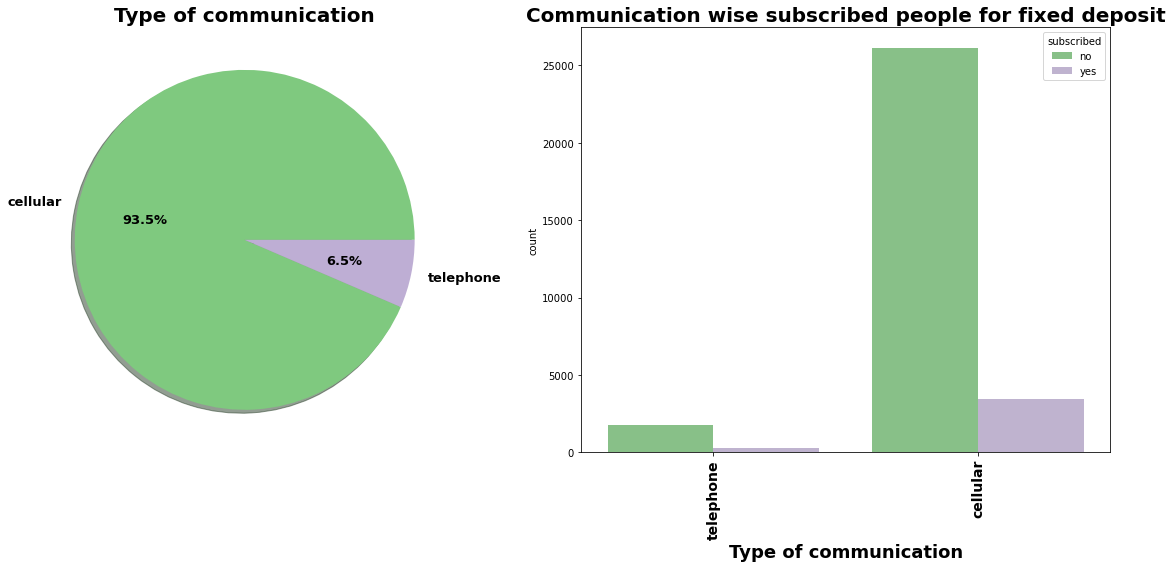

In [56]:
# Type of communication with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('Accent')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['contact'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Type of communication', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('contact',hue="subscribed",data=df_categorical,ax=ax[1])
ax[1].set_title('Communication wise subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Type of communication",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()

In [57]:
# Observations:

# The customers who have contacted through celluar communication have opted more for FD subscription;
# At the same time cellular contacted people didn't opt for FD subscription as well.
# This could be due to large percent of people were contacted through cellular communication

# Interestingly, % of people are high who didn't opt for FD subscription in all categories

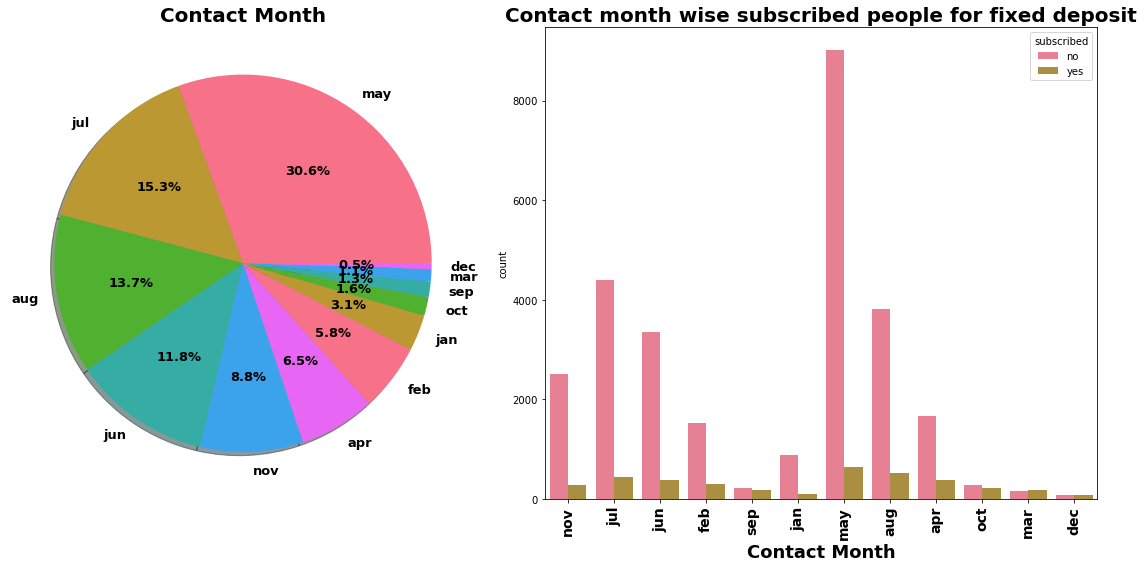

In [58]:
# Contact Month with subscribed FD

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df_categorical['month'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contact Month', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('month',hue="subscribed",data=df_categorical,ax=ax[1])
ax[1].set_title('Contact month wise subscribed people for fixed deposit',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contact Month",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.tight_layout()
plt.show()

In [59]:
#Observations:

# The customers who were contacted in month of may have opted more for FD subscriptions
# at the same time the people who were contacted in month of May have not opted more for FD subscriptions

# Overall FD subscriptions are high in the months of April, May, Jun, Jul and August

# Interestingly, % of people are high who didn't opt for FD subscription in all categories

# Bivariate Graphical Analysis for numerical data

<Figure size 864x504 with 0 Axes>

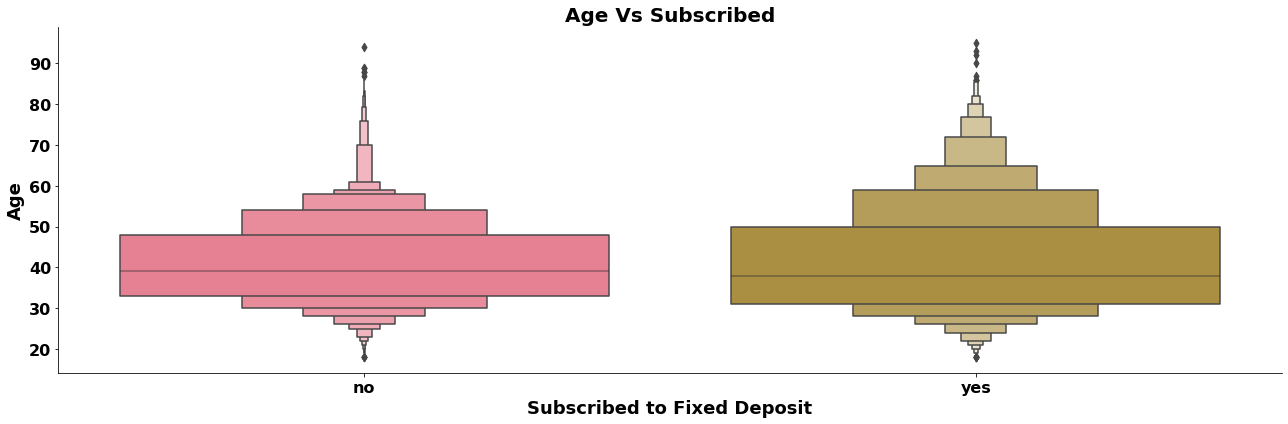

In [60]:
# Age with  subscribed FD

plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='age',data= df,
            kind="boxen",height=6, aspect=3)
plt.title("Age Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('Age', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [61]:
# Observations:

# There are large no. of people falling in the age range of 30 to 50 
# and less no. of people beyond age 50 and lower than age 30

# There are more people who opted for FD beyond the age 50

<Figure size 864x504 with 0 Axes>

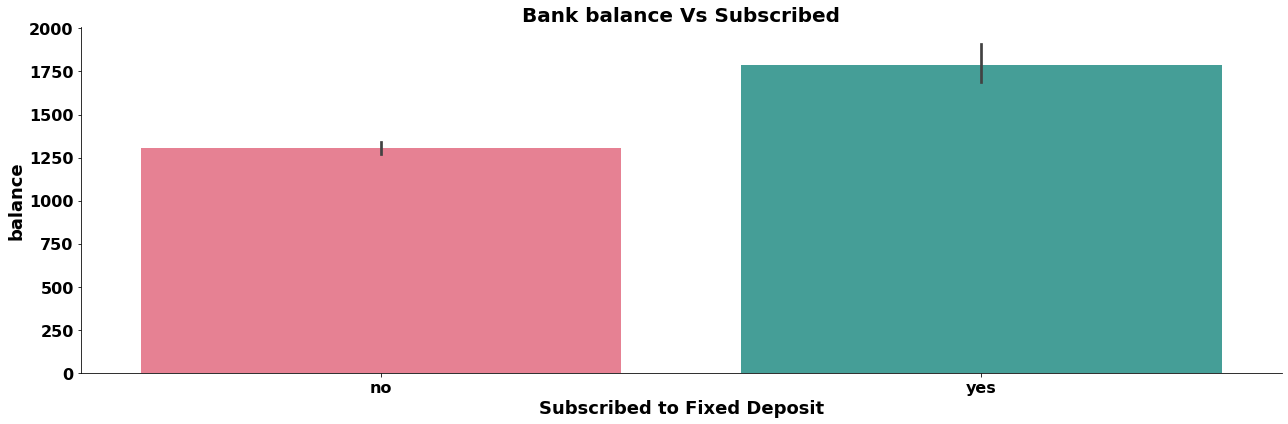

In [62]:
# Bank Balance  with  subscribed FD

plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='balance',data= df,
            kind="bar",height=6, aspect=3,palette='husl')
plt.title("Bank balance Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('balance', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [63]:
# Observations:

# The customers who have higher bank balance have opted for FD

<Figure size 864x504 with 0 Axes>

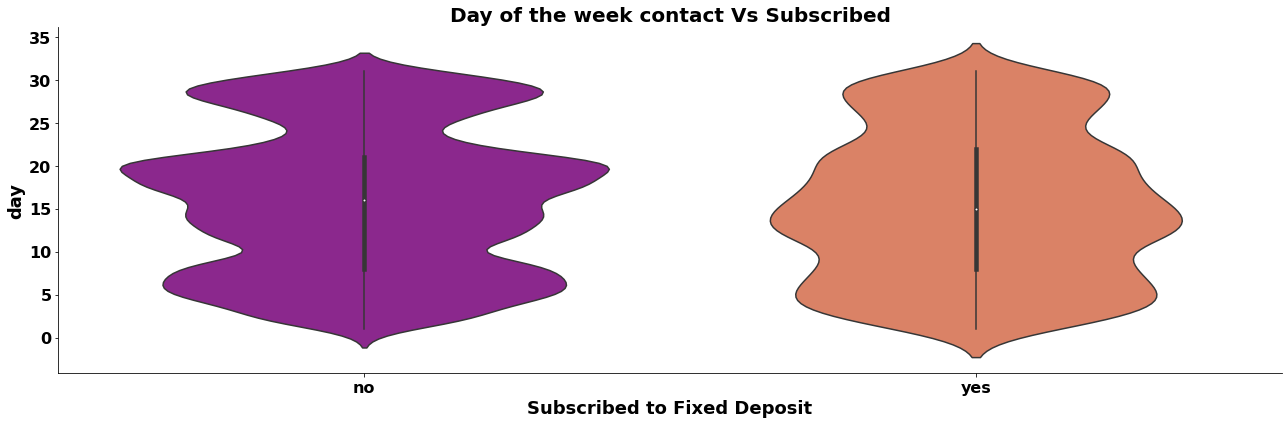

In [64]:
# Day of the week contact with  subscribed FD

plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='day',data= df,
            kind="violin",height=6, aspect=3,palette='plasma')
plt.title("Day of the week contact Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('day', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [65]:
# Observations:

# The customers who were contacted in the middle of the month have majorly not opted for FD

<Figure size 864x504 with 0 Axes>

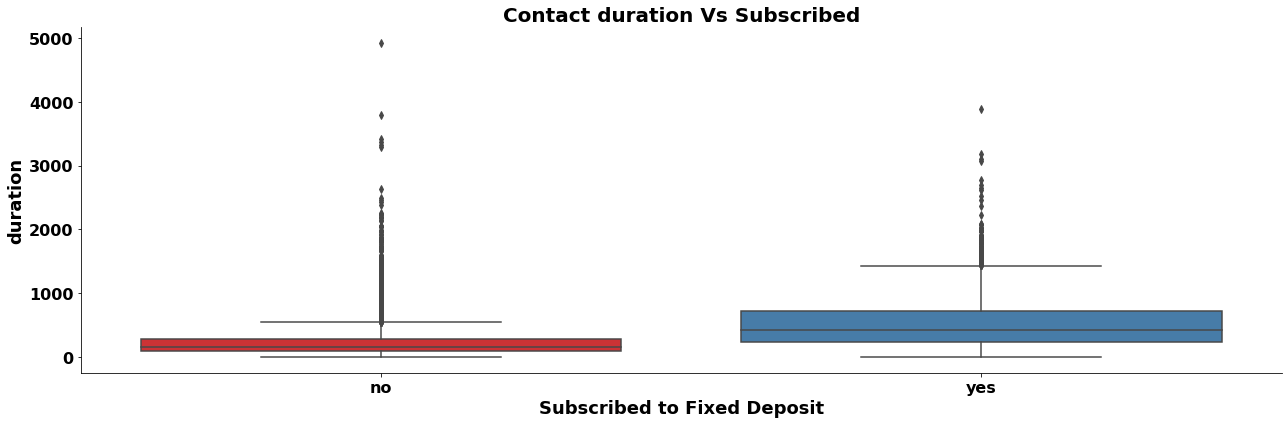

In [66]:
# Contact duration with subscribed FD
plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='duration',data= df,
            kind="box",height=6, aspect=3,palette='Set1')
plt.title("Contact duration Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('duration', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [67]:
# Observations:

# The customers with larger contact duration have opted more for FD subscriptions


<Figure size 864x504 with 0 Axes>

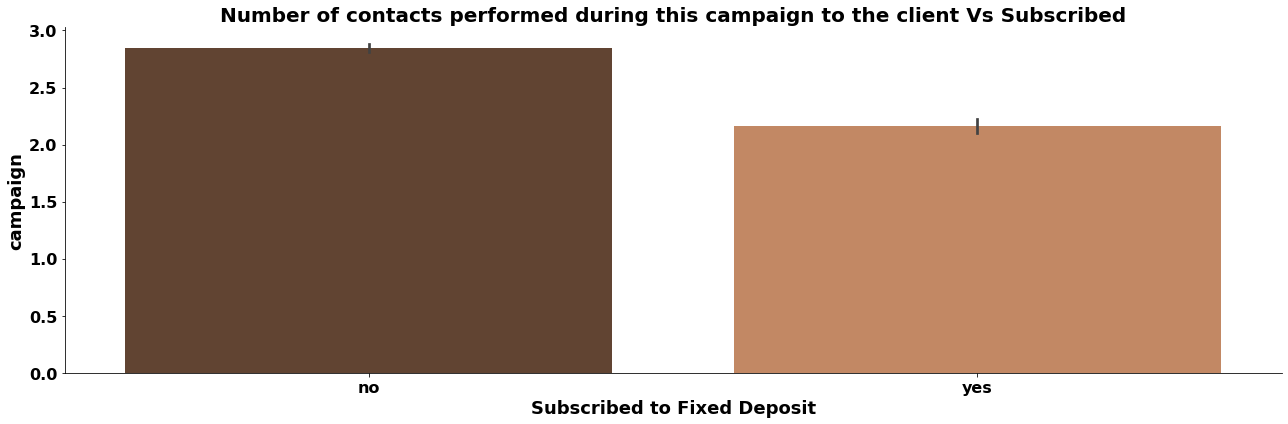

In [68]:
# Number of contacts performed during this campaign to the client VS Subscribed

plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='campaign',data= df,
            kind="bar",height=6, aspect=3,palette='copper')
plt.title("Number of contacts performed during this campaign to the client Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('campaign', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [69]:
# Observations:

# Eventhough campaign is high, FD subscription is less

<Figure size 864x504 with 0 Axes>

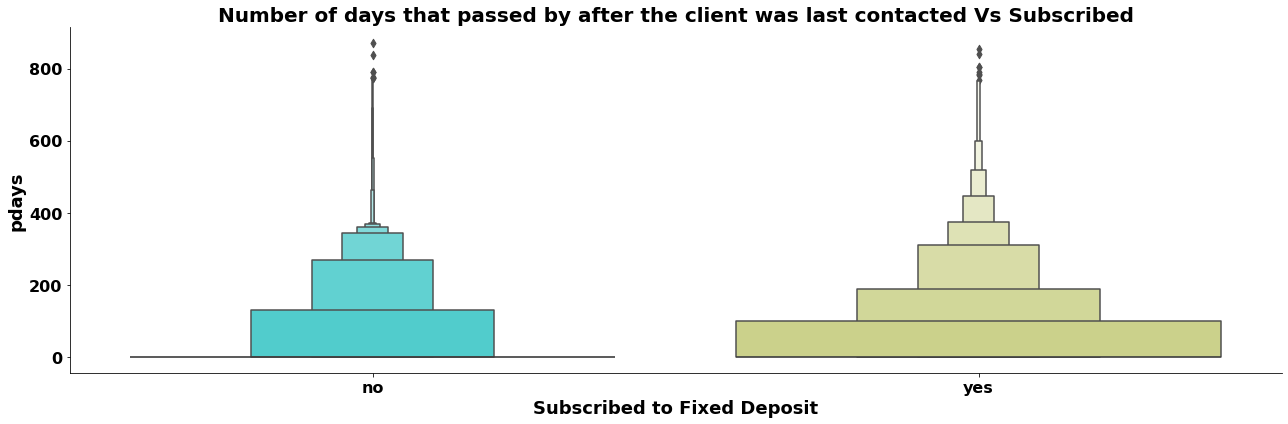

In [70]:
# Number of days that passed by after the client was last cotacted VS Subscribed

plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='pdays',data= df,
            kind="boxen",height=6, aspect=3,palette='rainbow')
plt.title("Number of days that passed by after the client was last contacted Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('pdays', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

In [71]:
# Observations:

# There are more no. of custmers who opted for FD subscription have been contacted 
#many days back compared to other category

<Figure size 864x504 with 0 Axes>

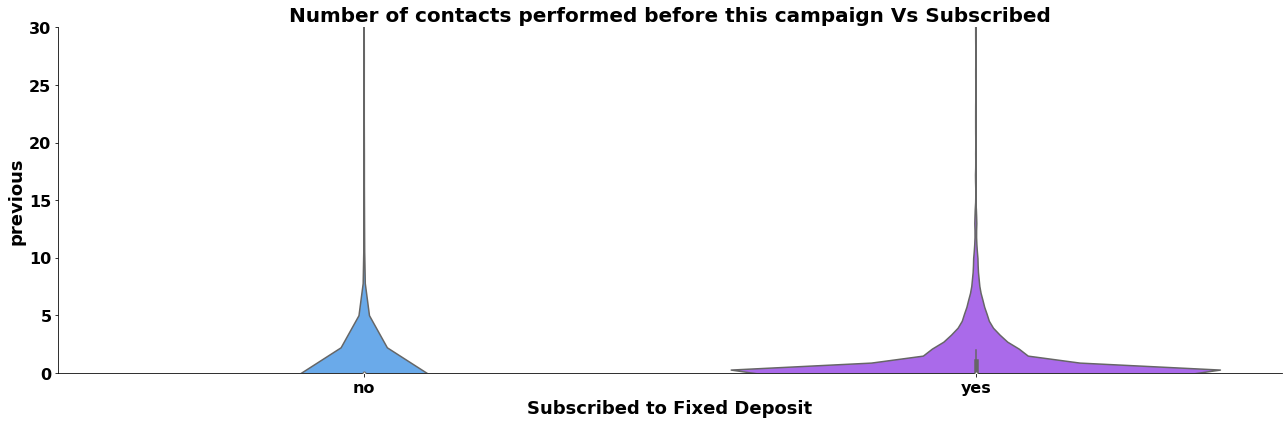

In [73]:
# Number of contacts performed before this campaign Vs Subscribed

plt.figure(figsize=(12,7))
sns.catplot(x='subscribed',y='previous',data= df,
            kind="violin",height=6, aspect=3,palette='cool')
plt.title("Number of contacts performed before this campaign Vs Subscribed",fontsize=20, fontweight='bold')
plt.xlabel('Subscribed to Fixed Deposit', fontsize=18,fontweight='bold')
plt.ylabel('previous', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.ylim(0.0,30.0)
plt.tight_layout()
plt.show()

In [74]:
# Observations:

# There are more no. of custmers who opted for FD subscription have been previously contacted 
#more times compared to other category

# Multivariate Graphical Analysis

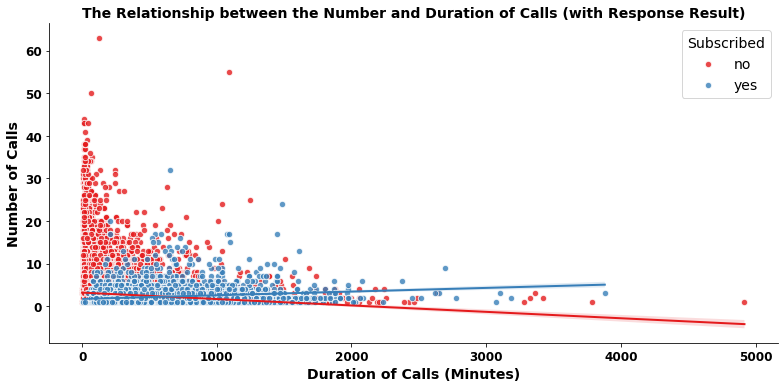

In [75]:
#Visualize the relationship between 'duration' & 'campaign': with Target(FD) result
sns.lmplot(x="duration",y="campaign",hue="subscribed",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'Set1',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)',fontsize=14,fontweight ='bold')
plt.xlabel('Duration of Calls (Minutes)', fontsize=14,fontweight='bold')
plt.ylabel('Number of Calls', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Subscribed', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()


In [76]:
# Observatioins:

# Here we can see that customer who said no, were contacted more than 10 times majorly
#and had a small call duration while customers who subscribed to FD were approached fewer times(less than 10 times majority of the times)
#and had longer call duration


# It is visible that after five campaign calls, clients are more likely to reject the term deposit unless the call duration is high

# Most of the customers who subscribed to fd were approached by less than 10 times


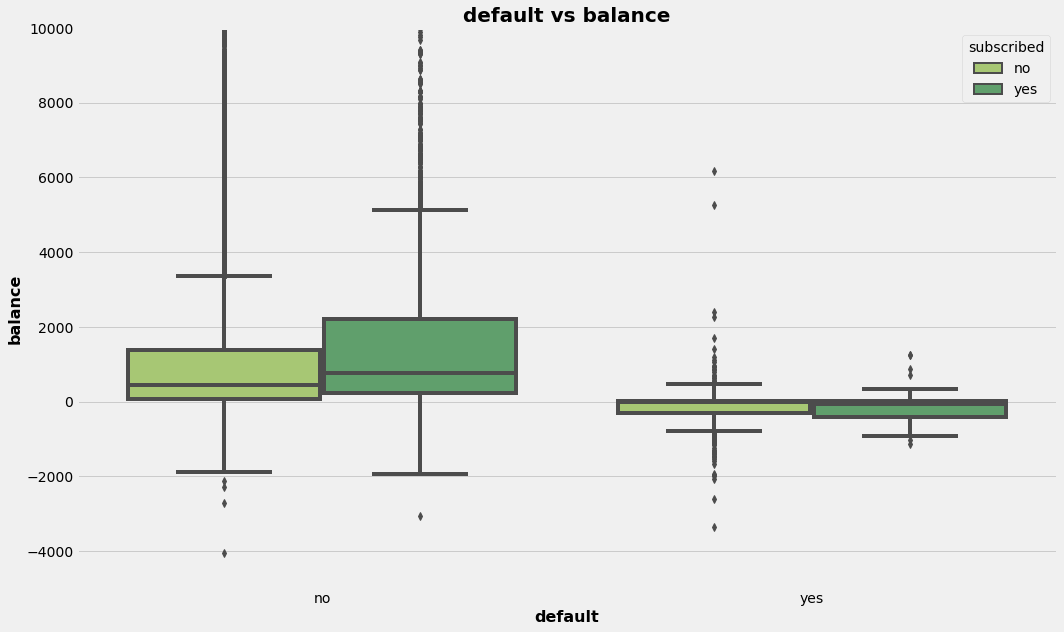

In [77]:
# Understand how the subscription rate get's affected by customer's credit default status & bank balance
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['default'], df['balance'],hue=df["subscribed"], palette = 'summer_r')
plt.title('default vs balance',fontsize=20,fontweight ='bold')
plt.xlabel('default', fontsize=16,fontweight='bold')
plt.ylabel('balance', fontsize=16,fontweight='bold')
plt.ylim(-5000,10000)
plt.show()

In [78]:
# Observations:

# Non defaulters have higher average bank balance and more likely to subscribe to FD option

# The customers with dafult status have negative to very low bank balance and are very less likely to avail FD

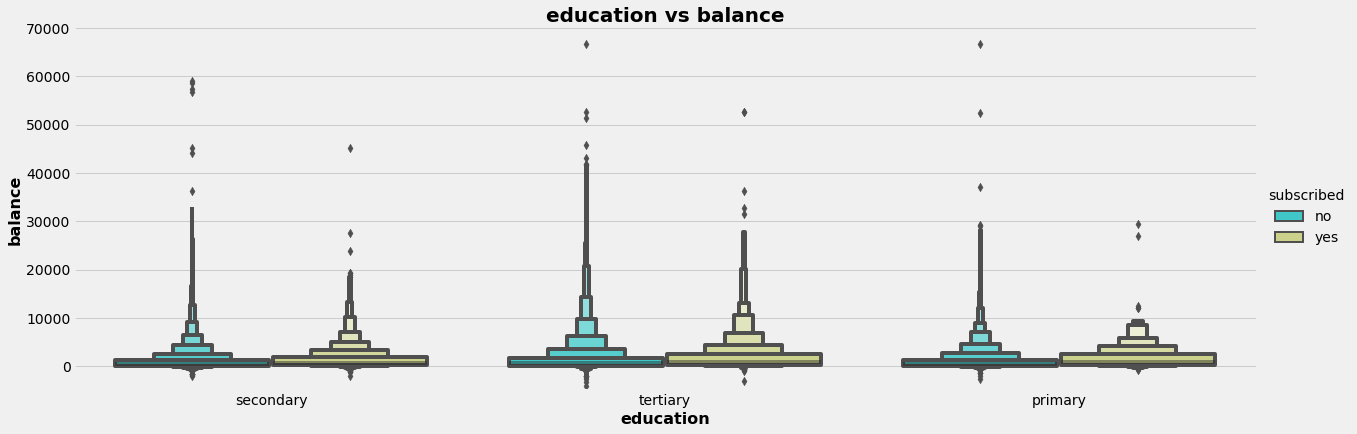

In [79]:
# understand how the subscription rate get's affected by customer's education level & bank balance
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.catplot(x='education',y='balance',hue='subscribed',data= df,
            kind="boxen",height=6, aspect=3,palette='rainbow')
#sns.boxplot(df['education'], df['balance'],hue=df["subscribed"], palette = 'rainbow')
plt.title('education vs balance',fontsize=20,fontweight ='bold')
plt.xlabel('education', fontsize=16,fontweight='bold')
plt.ylabel('balance', fontsize=16,fontweight='bold')
plt.ylim(-5000,70000)
plt.show()

In [80]:
# Observations:

# Customers with higher education tends to have higher bank balance and more fd subscription rate, 
# they also have higher number of customers who refused fd option


# Customers with primary level eduaction also tends to have high fd subscription rate close to tertiary

# There is no clear trend in this plot between education and balance impacting subscription decision


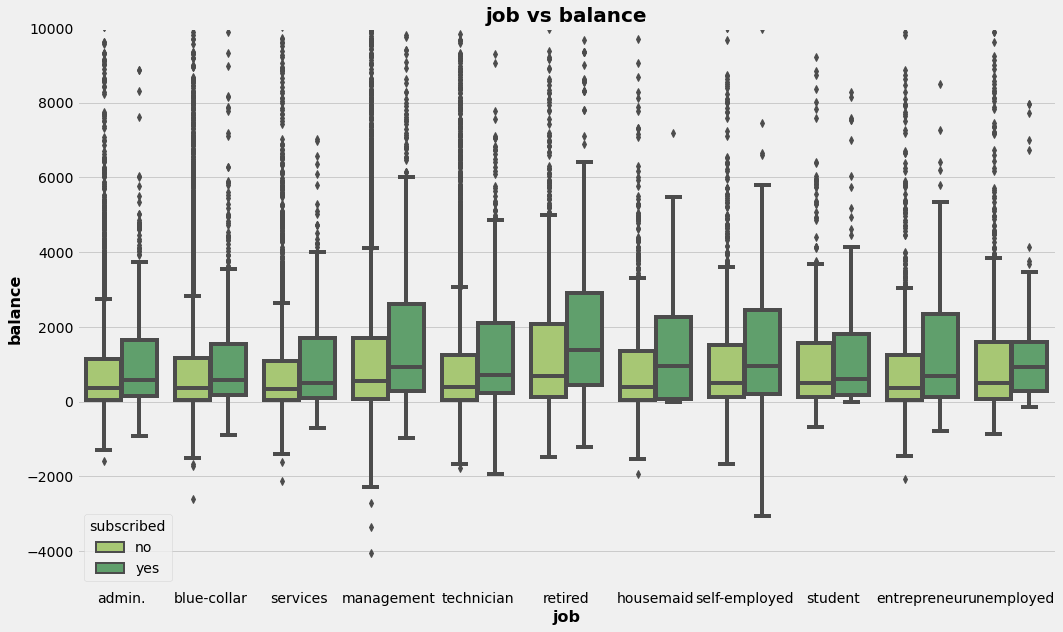

In [81]:
# understand how the subscription rate get's affected by customer's Job Type & bank balance
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['job'], df['balance'],hue=df["subscribed"], palette = 'summer_r')
plt.title('job vs balance',fontsize=20,fontweight ='bold')
plt.xlabel('job', fontsize=16,fontweight='bold')
plt.ylabel('balance', fontsize=16,fontweight='bold')
plt.ylim(-5000,10000)
plt.show()


In [82]:
# Observations:

# Customers who are retired seems to have more bank balance and more FD subscription rate

# Management professional seems to have less negative bank balance as compared to retired and
# also have second highest bank balance and fd subscription rate


# student doesn't seems to have negative bank balance ans so is the case with housemaid who seems to have very little negatuve bank balance

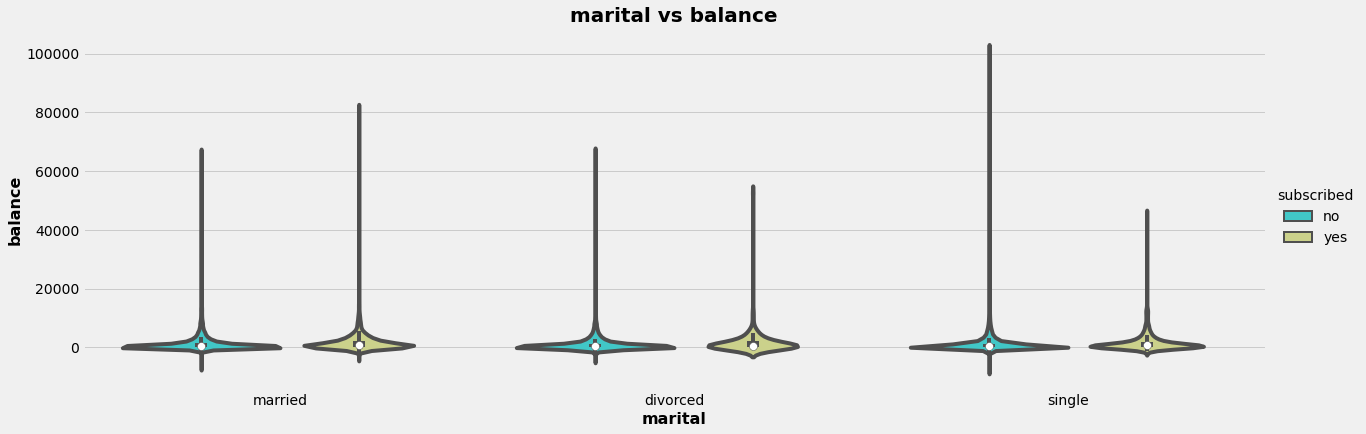

In [83]:
# understand how the subscription rate get's affected by customer's marital status & bank balance
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.catplot(x='marital',y='balance',hue='subscribed',data= df,
            kind="violin",height=6, aspect=3,palette='rainbow')
plt.title('marital vs balance',fontsize=20,fontweight ='bold')
plt.xlabel('marital', fontsize=16,fontweight='bold')
plt.ylabel('balance', fontsize=16,fontweight='bold')
#plt.ylim(-5000,70000)
plt.show()

In [84]:
# Observations:

# married customers seems to have higher bank balance and so are more likely to subscriobe to FD

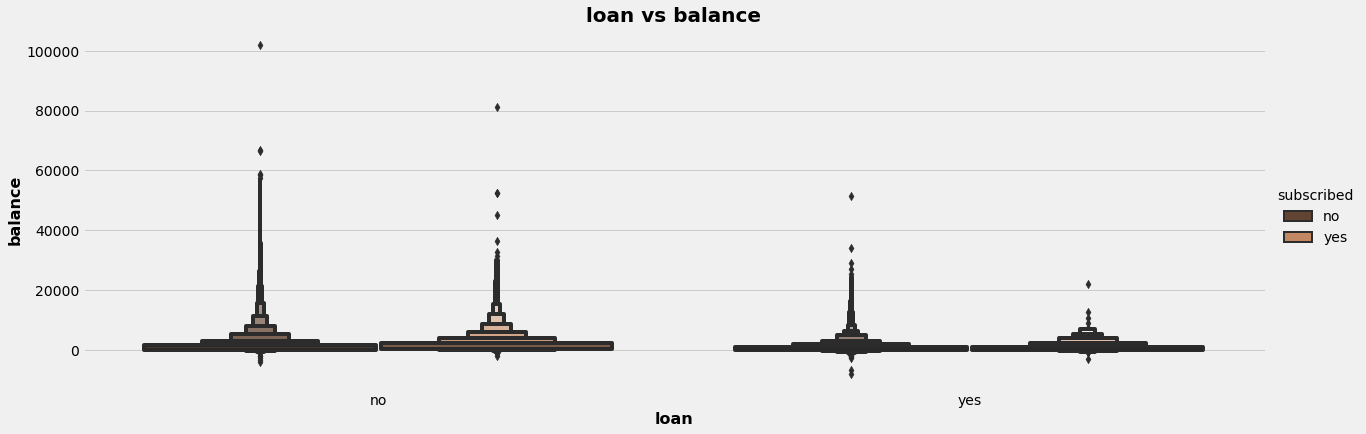

In [85]:
# understand how the subscription rate get's affected by customer's Personal loan status & bank balance
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.catplot(x='loan',y='balance',hue='subscribed',data= df,
            kind="boxen",height=6, aspect=3,palette='copper')
plt.title('loan vs balance',fontsize=20,fontweight ='bold')
plt.xlabel('loan', fontsize=16,fontweight='bold')
plt.ylabel('balance', fontsize=16,fontweight='bold')
#plt.ylim(-5000,70000)
plt.show()

In [86]:
#Observations:

# customers with no Personal loan seems to have higher bank balance and higer FD subscription rate
    
    

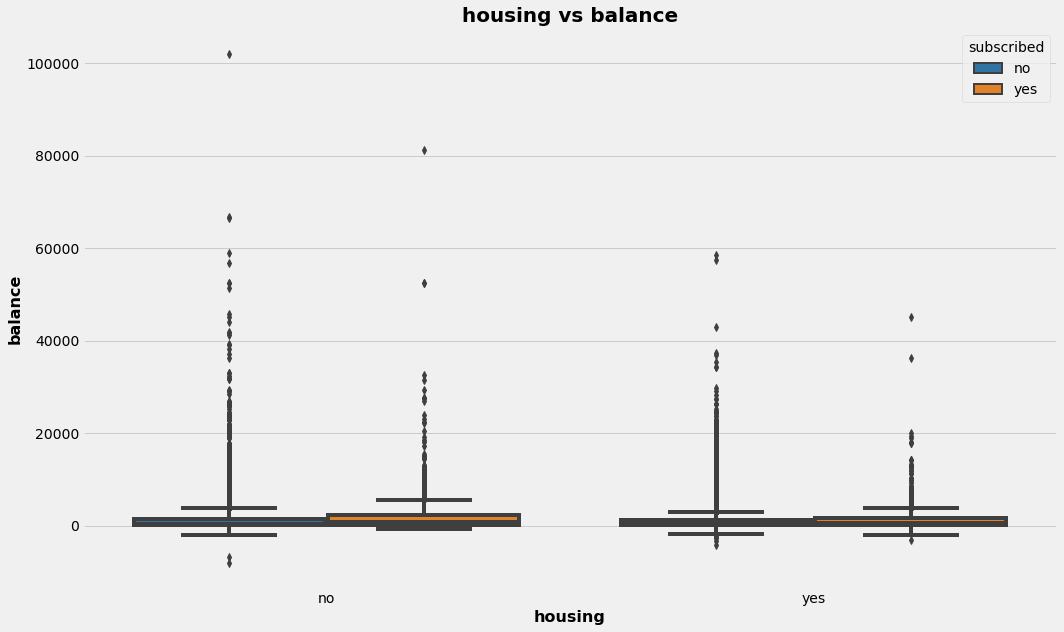

In [87]:
# understand how the subscription rate get's affected by customer's housing loan status & bank balance
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['housing'], df['balance'],hue=df["subscribed"], palette = 'tab10')
plt.title('housing vs balance',fontsize=20,fontweight ='bold')
plt.xlabel('housing', fontsize=16,fontweight='bold')
plt.ylabel('balance', fontsize=16,fontweight='bold')
#plt.ylim(-5000,10000)
plt.show()


In [88]:
# Observations:

# Customers with no housing loan seems to have higher bank balance and so are more likely to opt for FD

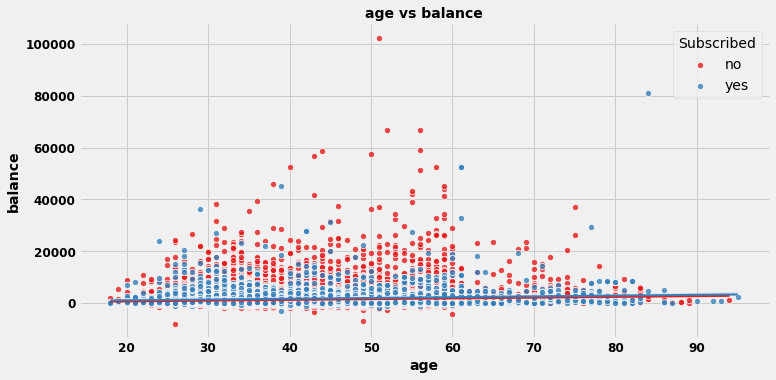

In [89]:
# understand how the subscription rate get's affected by age & bank balance
sns.lmplot(x="age",y="balance",hue="subscribed",data= df, height=5.5, aspect=2,line_kws={'linewidth':2},palette = 'Set1',scatter_kws={"s": 40,'edgecolor':'w'},legend=False)
plt.title('age vs balance',fontsize=14,fontweight ='bold')
plt.xlabel('age', fontsize=14,fontweight='bold')
plt.ylabel('balance', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.legend(title='Subscribed', fontsize='14', title_fontsize='14',loc="upper right", frameon=True)
plt.tight_layout()
plt.show()

In [90]:
# Observations:

# Age group of 40 to 60 customers have higher bank balance those who most likely to have FD subscription

# FD subscription rate is less at small age and increases with age

# Encoding of categorical features:

In [91]:
df_categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'subscribed'],
      dtype='object')

In [92]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,subscribed
0,56,0,1,1,0,1933,0,0,1,19,9,44,2,-1,0,0
1,31,1,1,1,0,3,0,0,0,20,5,91,2,-1,0,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,0


In [93]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'subscribed']}

In [94]:
# Observation

# All converted into integer data type

# Checking coefficients of correlation (r)

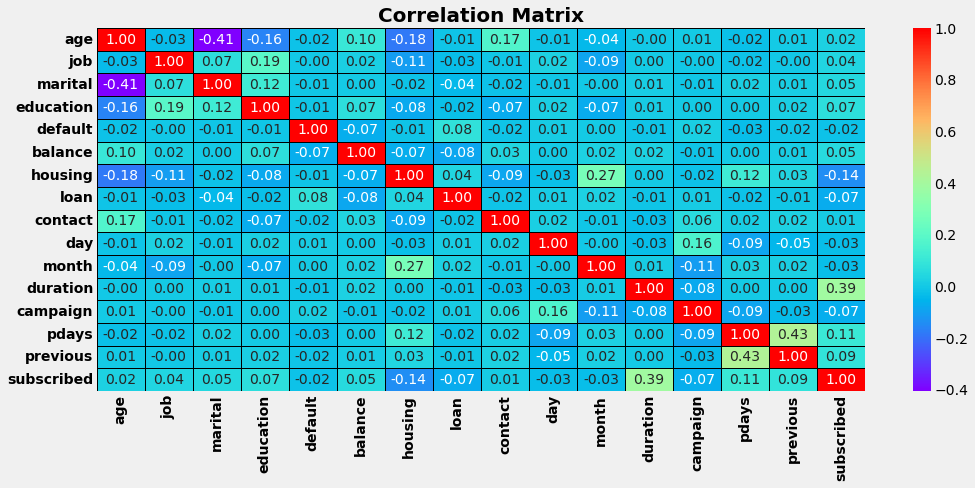

In [95]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=90)
plt.yticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

In [96]:
corr_r["subscribed"].sort_values(ascending=False) 

subscribed    1.000000
duration      0.389838
pdays         0.108290
previous      0.088081
education     0.069300
balance       0.050807
marital       0.046043
job           0.038779
age           0.024538
contact       0.011058
default      -0.020168
month        -0.028088
day          -0.029600
campaign     -0.070607
loan         -0.072266
housing      -0.141092
Name: subscribed, dtype: float64

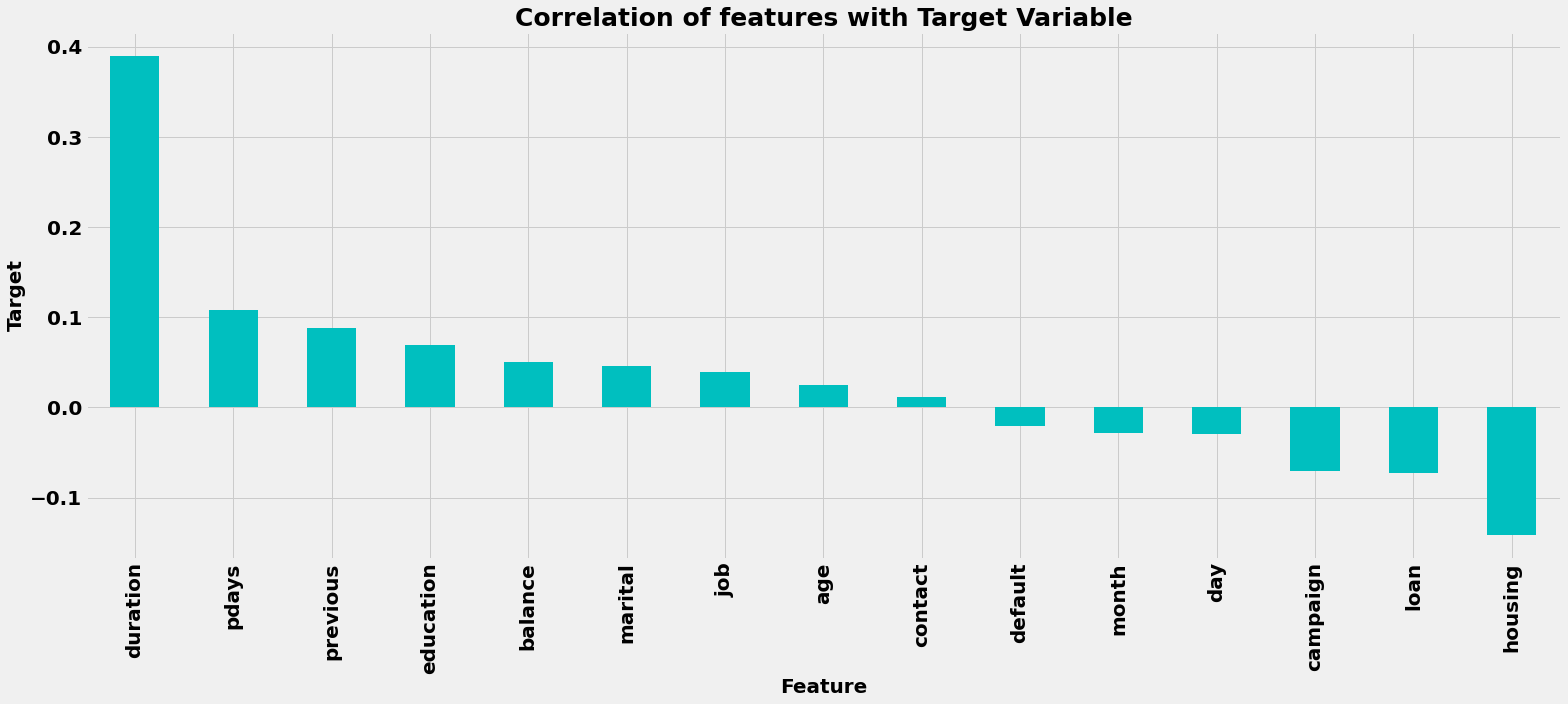

In [97]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Target',fontsize=20,fontweight='bold')
plt.title('Correlation of features with Target Variable',fontsize=25,fontweight='bold')
plt.xticks(fontsize=20,fontweight ='bold',rotation=90)
plt.yticks(fontsize=20,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [98]:
# Observations:

# Age,Day,default,month are very weakly correlated with the target variable

# duration is moderately correlated with the target variable

# most of the columns are having weak correlation with target variable

# I will check feature scores from SelectKBest algorithm with ANOVA F-value 
#and will check if any features have lower score to take futher decisions.

# Checking top features using SelectKBest algorithm

In [99]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


x=df.drop("subscribed",axis=1)  # #independent columns
y=df["subscribed"]  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print 18 best features

        Specs        Score
11   duration  5671.062516
6     housing   642.748084
13      pdays   375.492162
14   previous   247.430356
7        loan   166.127429
12   campaign   158.549603
3   education   152.707389
5     balance    81.897908
2     marital    67.228362
1         job    47.658570
9         day    27.749526
10      month    24.986423
0         age    19.065588
4     default    12.876385
8     contact     3.869724


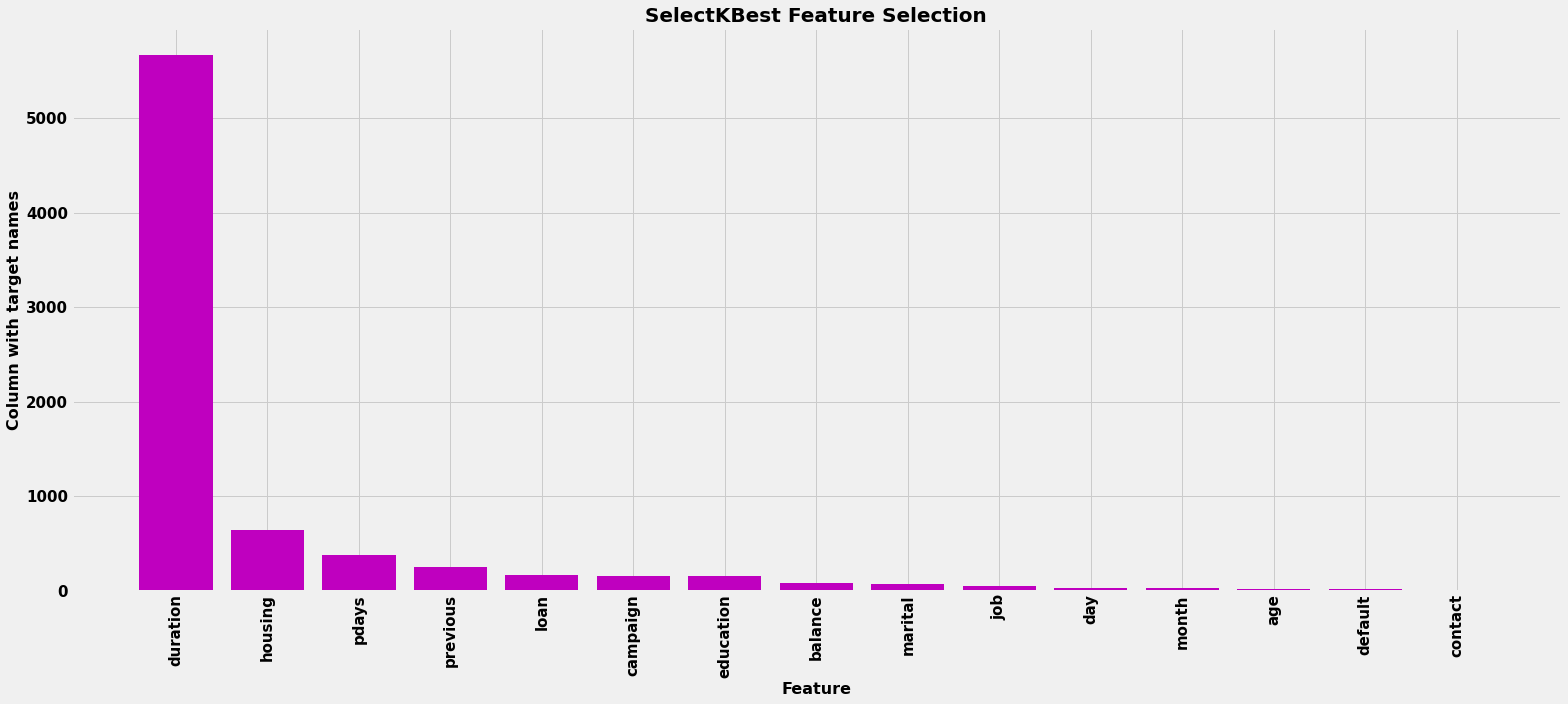

In [100]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [101]:
# Observations:

# After comparing both the correlation(r) coefficients and SelectKBest feature scores,

# I am going to drop Contact, default,age,month and day

# As the above mentioned features have both very weak correlations as well as low feature scores with SelectKBest method


In [102]:
# Dropping columns from the dataframe
df.drop(["day","month","age","default","contact"],axis=1,inplace=True)


In [103]:
df.head(5)

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,subscribed
0,0,1,1,1933,0,0,44,2,-1,0,0
1,1,1,1,3,0,0,91,2,-1,0,0
2,7,1,1,891,1,0,240,1,-1,0,0
3,4,0,2,3287,0,0,867,1,84,3,1
4,9,1,1,119,1,0,380,1,-1,0,0


In [104]:
x=df.drop(["subscribed"],axis=1)

# Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [105]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x[list(x.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,3.660843,marital
2,3.629691,education
0,2.602971,job
4,1.986267,housing
6,1.844238,duration
7,1.657021,campaign
8,1.441173,pdays
9,1.295437,previous
3,1.201873,balance
5,1.174396,loan


In [106]:
# Observations:

# Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features

# As there are no features with VIF values > 10 i.e. there is no multicollinearity between features hence not dropping any columns based on VIF score

# I will use this data for further processing of model building

# Pre-processing:

In [107]:
# Segregating only X data
x=df.drop("subscribed",axis=1)
y=df["subscribed"]

In [108]:
x.head(5)

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,0,1,1,1933,0,0,44,2,-1,0
1,1,1,1,3,0,0,91,2,-1,0
2,7,1,1,891,1,0,240,1,-1,0
3,4,0,2,3287,0,0,867,1,84,3
4,9,1,1,119,1,0,380,1,-1,0


In [109]:
y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

In [110]:
df_numerical=df[['balance', 'duration', 'campaign', 'pdays', 'previous']].copy()

In [111]:
df_numerical.head(5)

,balance,duration,campaign,pdays,previous
0,1933,44,2,-1,0
1,3,91,2,-1,0
2,891,240,1,-1,0
3,3287,867,1,84,3
4,119,380,1,-1,0


# Removing Outliers using z-score method

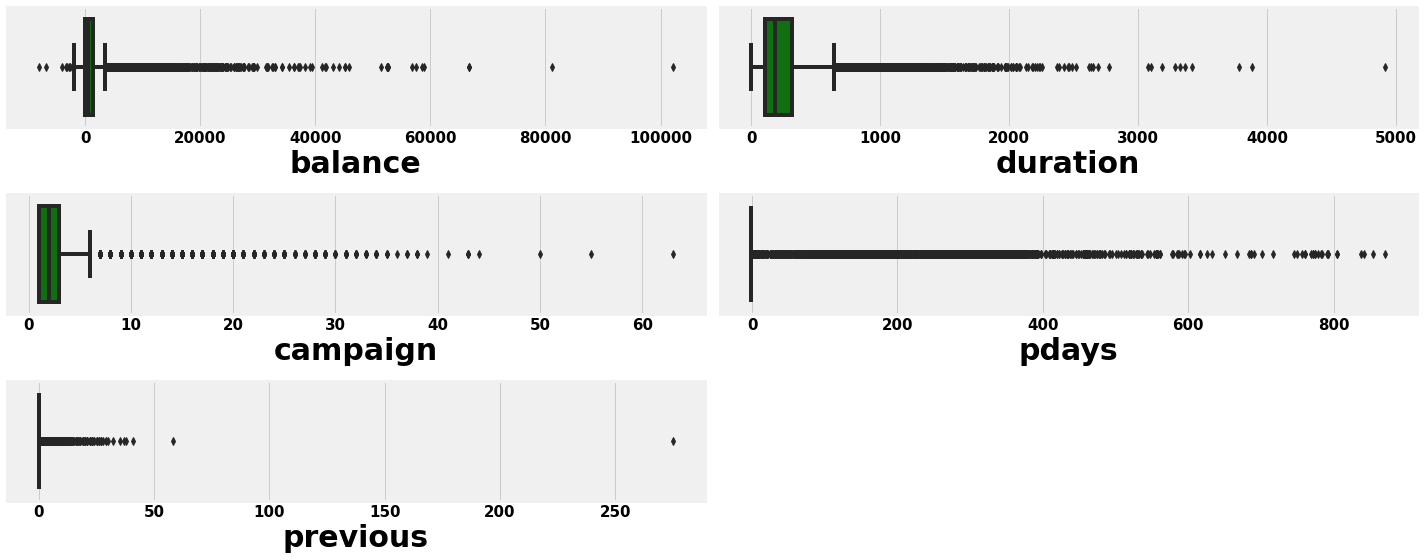

In [112]:
# We don't remove outliers of categorical X columns and in target variable, hence checking outliers for numerical X features
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in df_numerical:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()


In [113]:
# Observations

# Outliers are present in all the columns

# Removing Outliers using z-score method

In [114]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_numerical))
threshold=3
np.where(z>3)

(array([   21,    26,    36, ..., 31622, 31645, 31646]),
 array([2, 0, 3, ..., 3, 4, 1]))

In [115]:
# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_numerical_new=df_numerical[(z<3).all(axis=1)]
x_new=x[(z<3).all(axis=1)]
y_new=y[(z<3).all(axis=1)]

In [116]:
# Observations

# Outliers are removed from the features

In [117]:
x_new.shape

(28371, 10)

In [118]:
y_new.shape

(28371,)

In [119]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-x_new.shape[0])/x.shape[0]*100,1)
loss_percent_zscore

10.4

In [120]:
# Observations:

# Data loss with z-score method is 10.4%.

# Now I will check the dataloss using IQR method as well and will take a call accordingly


# Removing Outliers using IQR method

In [121]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_numerical.quantile(0.25)
Q3=df_numerical.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_numerical_upd = df_numerical[((df_numerical>=(Q1-1.5*IQR)) & (df_numerical<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
x_new1 = x[((df_numerical>=(Q1-1.5*IQR)) & (df_numerical<=(Q3+1.5*IQR))).all(axis=1)]
y_new1 = y[((df_numerical>=(Q1-1.5*IQR)) & (df_numerical<=(Q3+1.5*IQR))).all(axis=1)]

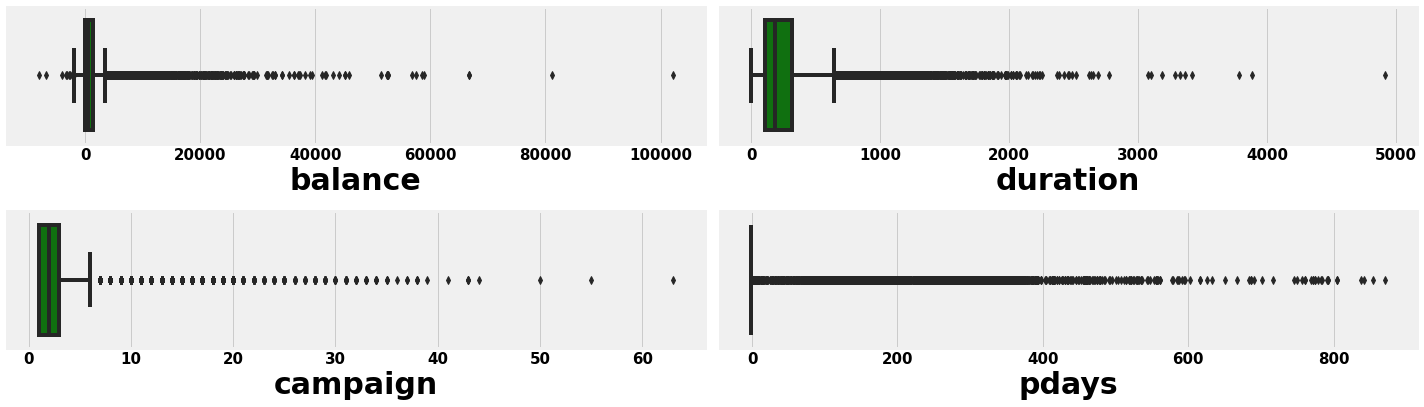

In [122]:
# Plotting features to check for outliers removal
plt.figure(figsize=(20,8),facecolor='white')
plotnumber=1

for column in df_numerical_upd:
    if plotnumber<=4:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=30,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

In [123]:
# Observations

# Outliers are removed from all features

In [124]:
x_new1.shape

(19942, 10)

In [125]:
y_new1.shape

(19942,)

In [126]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((x.shape[0]-x_new1.shape[0])/x.shape[0]*100,1)
display(loss_percent_IQR)

37.0

In [128]:
# Observations:

# Data loss with IQR is 37.0% which is higher than data loss with z-score (10.4%), 

# Hence considering x & y data after removing outliers using zscore method for model building

In [129]:
x=x_new
y=y_new

# Skewness Check

In [131]:
# We don't remove skewness from categorical X data and from target variable
#hence checking skewness on X features with numerical data 

# Segregating numerical X features to check skewness


x_con=x[["balance","duration","campaign","pdays","previous"]].copy()

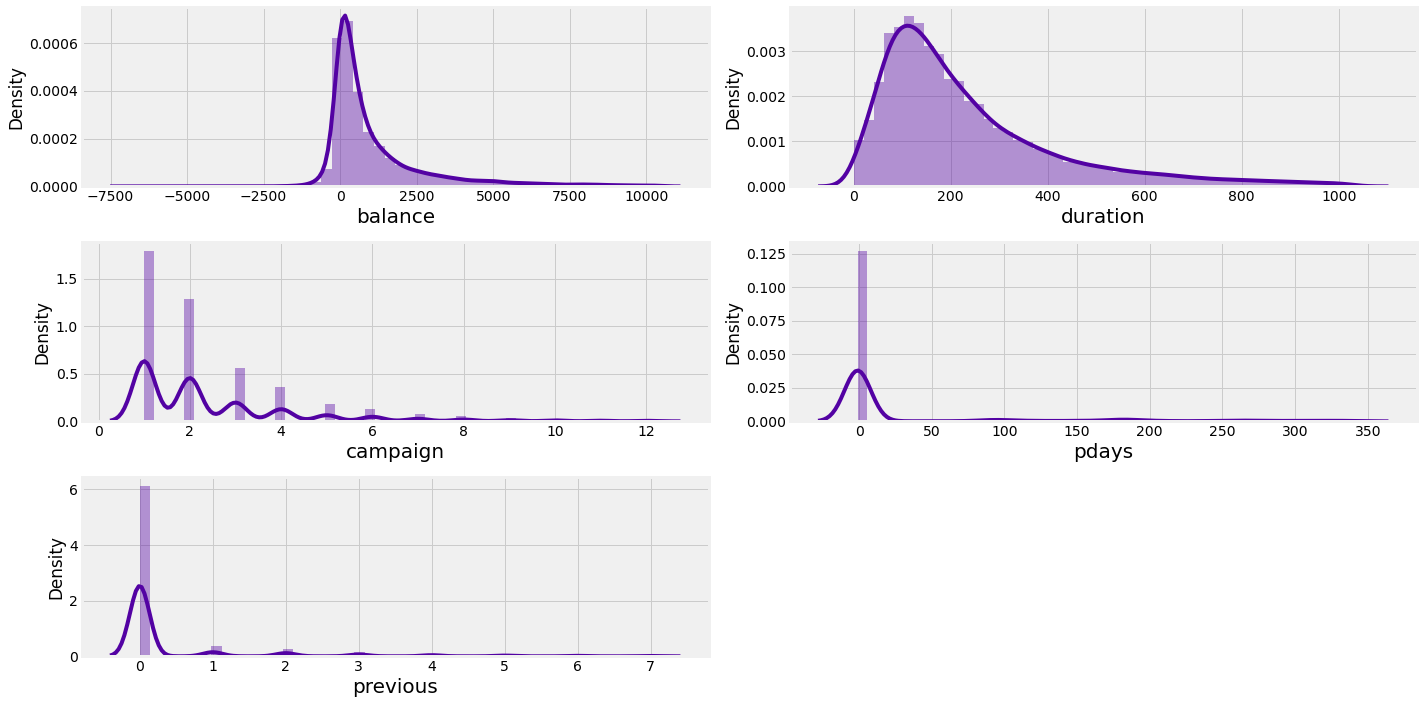

In [132]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in x_con:
    if plotnum<=5:
        plt.subplot(3,2,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [133]:
# Observatins:

# All the features are having skewed data
# hence I need to remove or reduce the skewness of all these features to get better model performance


In [134]:
# Checking skeweness and arranging the values in descending order
x_con.skew().sort_values(ascending=False) 

previous    3.661232
pdays       2.800806
balance     2.424784
campaign    2.064713
duration    1.596116
dtype: float64

In [135]:
# Observations:

# Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are all variables beyond this range

# I will apply various methods to remove skewness and will consider the one with lowest skewness

In [136]:
# Method 1: Using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x_con)
x3=pd.DataFrame(data=x_new_pt,columns=x_con.columns)
x3.skew().sort_values(ascending=False)

pdays       2.058333
previous    2.057344
campaign    0.206497
balance     0.186808
duration    0.003976
dtype: float64

In [137]:
# Observations:

# Skewness is reduced using powerTransformer method.I will check with other methods to remove skewness

# Skewness range: (-2.05,+2.05)

In [139]:
# Method 2: SquareRoot transformation using numpy
import numpy as np
x4=pd.DataFrame()
x4['previous']=np.sqrt(x['previous'])
x4['pdays']=np.sqrt(x['pdays'])
x4['balance']=np.sqrt(x['balance'])
x4['campaign']=np.sqrt(x['campaign'])
x4['duration']=np.sqrt(x['duration'])
x4.skew().sort_values(ascending=False)

previous    2.536475
campaign    1.235731
balance     0.981745
duration    0.676848
pdays      -0.686381
dtype: float64

In [140]:
# Observations:
# Skewness range: (-2.53,+2.53)

In [141]:
# Method 3: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_new_qt=qt.fit_transform(x_con)
x5=pd.DataFrame(data=x_new_qt,columns=x_con.columns)
x5.skew().sort_values(ascending=False)

pdays       2.066711
previous    2.066143
balance     0.001916
duration    0.000183
campaign   -0.055403
dtype: float64

In [142]:
# Observation:

# Skewness is reduced further with quantile transformer method compared to power tansformer for most of the features

# After considering values from different transformation methods,I am choosing Quantile transformer

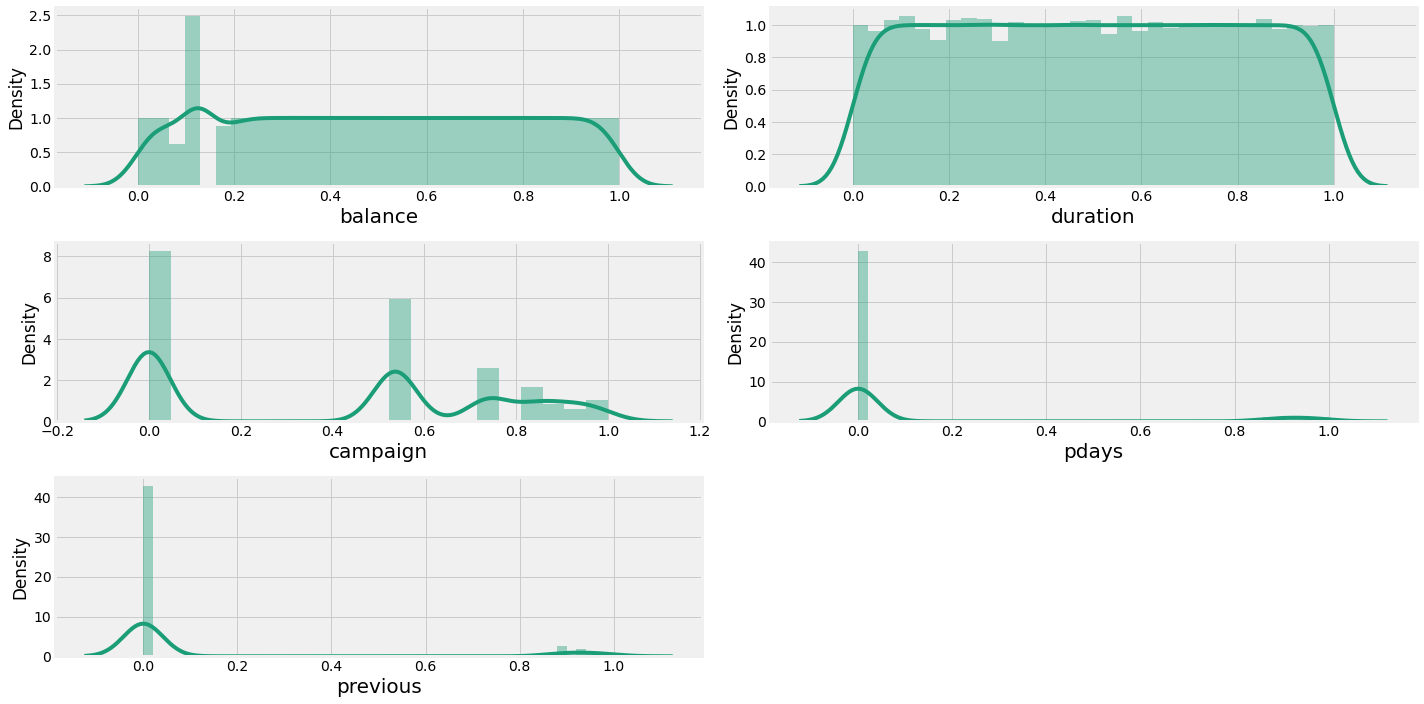

In [143]:
# Visually checking skewness after applying "Quantile Transformer method"
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x5:
    if plotnum<=5:
        plt.subplot(3,2,plotnum)
        sns.distplot(x5[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [144]:
# Observations:

# As the skewness is least using "quantile transformer" for most of the features, 
# I am using transformed x data from "quantile transformer" for model building

# Grouping both transformed numerical and categorical data

In [145]:
# entire x data including both numerical and categorical features
x 

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,0,1,1,1933,0,0,44,2,-1,0
1,1,1,1,3,0,0,91,2,-1,0
2,7,1,1,891,1,0,240,1,-1,0
3,4,0,2,3287,0,0,867,1,84,3
4,9,1,1,119,1,0,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
31640,4,2,1,2968,0,0,30,4,-1,0
31641,9,2,2,1309,0,0,442,2,-1,0
31642,4,2,2,0,1,0,116,2,-1,0
31643,4,0,2,380,0,1,438,2,-1,0


In [148]:
# reset the index of x data

new_x=x.reset_index(drop=True)

In [149]:
# entire x data including both numerical and categorical features after resetting the index

new_x

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,0,1,1,1933,0,0,44,2,-1,0
1,1,1,1,3,0,0,91,2,-1,0
2,7,1,1,891,1,0,240,1,-1,0
3,4,0,2,3287,0,0,867,1,84,3
4,9,1,1,119,1,0,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...
28366,4,2,1,2968,0,0,30,4,-1,0
28367,9,2,2,1309,0,0,442,2,-1,0
28368,4,2,2,0,1,0,116,2,-1,0
28369,4,0,2,380,0,1,438,2,-1,0


In [150]:
# Transformed numerical data

x5

,balance,duration,campaign,pdays,previous
0,0.817818,0.056557,0.536537,0.00000,0.000000
1,0.174675,0.201702,0.536537,0.00000,0.000000
2,0.660661,0.644645,0.000000,0.00000,0.000000
3,0.902332,0.985785,0.000000,0.86987,0.956957
4,0.294294,0.825826,0.000000,0.00000,0.000000
...,...,...,...,...,...
28366,0.887438,0.034034,0.840841,0.00000,0.000000
28367,0.740741,0.869369,0.536537,0.00000,0.000000
28368,0.124625,0.293293,0.536537,0.00000,0.000000
28369,0.471471,0.867367,0.536537,0.00000,0.000000


In [151]:
for i in x_con.columns:
    new_x[i]=x5[i]

In [152]:
# Grouped x data with tranformed numerical data and categorical data

new_x

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,0,1,1,0.817818,0,0,0.056557,0.536537,0.00000,0.000000
1,1,1,1,0.174675,0,0,0.201702,0.536537,0.00000,0.000000
2,7,1,1,0.660661,1,0,0.644645,0.000000,0.00000,0.000000
3,4,0,2,0.902332,0,0,0.985785,0.000000,0.86987,0.956957
4,9,1,1,0.294294,1,0,0.825826,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...
28366,4,2,1,0.887438,0,0,0.034034,0.840841,0.00000,0.000000
28367,9,2,2,0.740741,0,0,0.869369,0.536537,0.00000,0.000000
28368,4,2,2,0.124625,1,0,0.293293,0.536537,0.00000,0.000000
28369,4,0,2,0.471471,0,1,0.867367,0.536537,0.00000,0.000000


In [153]:
# checking for null values if any due to transformation and grouping

new_x.isnull().sum().sum()

0

# Scaling data

In [154]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,-1.321925,-0.270849,-0.212335,1.101181,-1.096763,-0.445084,-1.536181,0.314324,-0.405557,-0.405586
1,-1.013456,-0.270849,-0.212335,-1.127030,-1.096763,-0.445084,-1.033374,0.314324,-0.405557,-0.405586
2,0.837361,-0.270849,-0.212335,0.556700,0.911774,-0.445084,0.501053,-1.159404,-0.405557,-0.405586
3,-0.088047,-1.921248,1.318580,1.393985,-1.096763,-0.445084,1.682821,-1.159404,2.276995,2.545577
4,1.454300,-0.270849,-0.212335,-0.712600,0.911774,-0.445084,1.128695,-1.159404,-0.405557,-0.405586


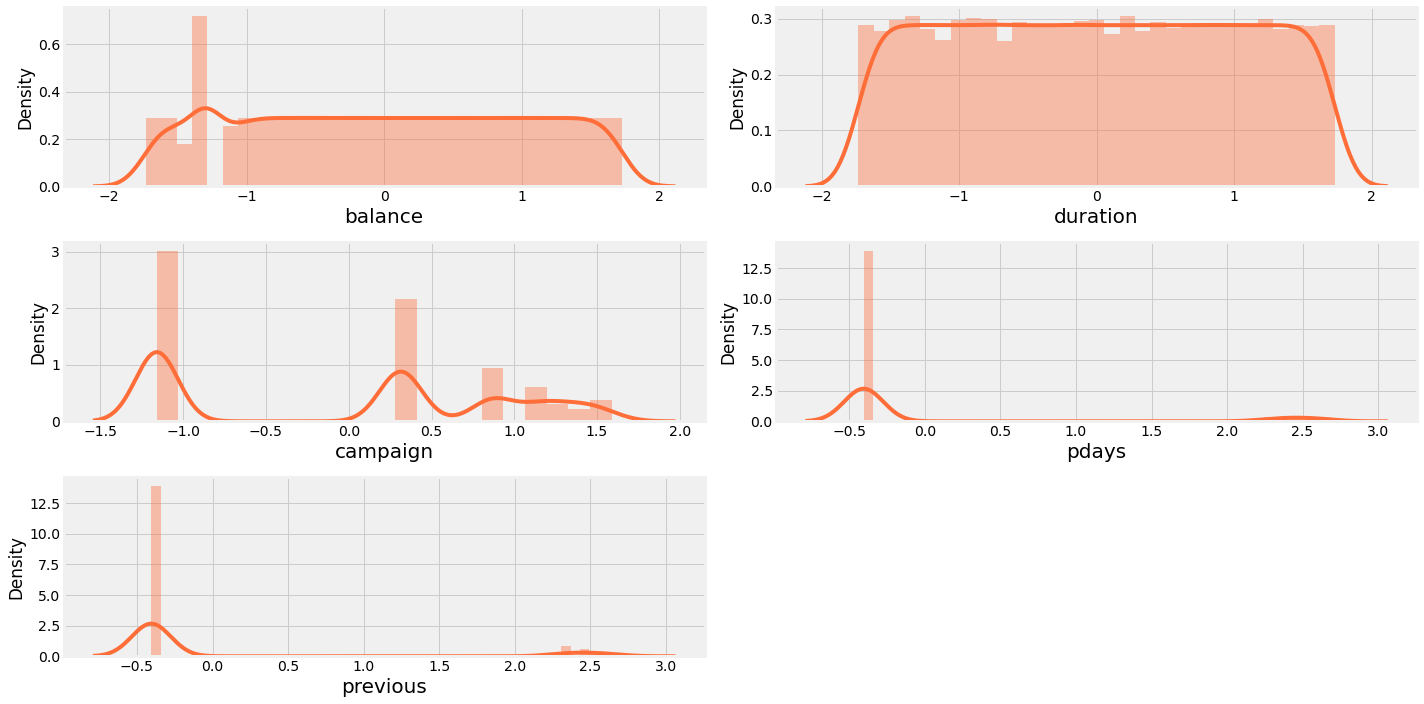

In [155]:
# Visually checking the distribution plots after scaling the data
x_num=['balance', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(20,10),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_num:
    if plotnum<=5:
        plt.subplot(3,2,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# SMOTE for classfication

In [156]:
# As the target variable classes are imbalanced, 
# Using the random oversampling technique "SMOTE" for balancing the classes in target variable

In [157]:
# Checking the value count of target column
y.value_counts()

0    25410
1     2961
Name: subscribed, dtype: int64

In [158]:
x.shape

(28371, 10)

In [159]:
y.shape

(28371,)

In [160]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)


In [161]:
# Checking the value count of target column
y.value_counts()


0    25410
1    25410
Name: subscribed, dtype: int64

In [162]:
# Observations:

# Classes are balanced in the target column

In [163]:
x.shape

(50820, 10)

In [164]:
y.shape

(50820,)

0    25410
1    25410
Name: subscribed, dtype: int64


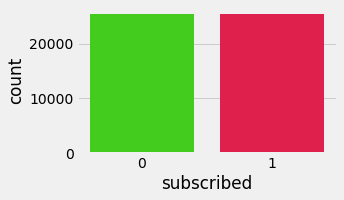

In [165]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

In [166]:
# Observations:

# Classes are balanced in the target column

# EDA part is completed and I will proceed with Model Building

# Model Building

In [167]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

In [168]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append(abs((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100)))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
1,9,79.388036,79.388036,0.000000
103,971,79.388036,79.388036,0.000000
100,952,79.447068,79.447068,0.000000
37,299,79.456907,79.456907,0.000000
87,831,79.375738,79.378198,0.002460
...,...,...,...,...
46,373,79.437229,79.358520,0.078709
24,200,79.439689,79.358520,0.081169
3,19,79.360980,79.447068,0.086088
16,129,79.447068,79.358520,0.088548


In [169]:
# Observations:

# From the above table, as multple random states give same training and testing accuarcy scores, 
# taking one of this from the below code

In [170]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

9

In [171]:
# Observations:

# Considering random state=9 for the model building

In [172]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [173]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.7938803620621803


In [174]:
 # Printing classificatin report
    
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5012
           1       0.78      0.82      0.80      5152

    accuracy                           0.79     10164
   macro avg       0.79      0.79      0.79     10164
weighted avg       0.79      0.79      0.79     10164



In [175]:
# printing confusion matrix

print(confusion_matrix(y_test,pred_test))

[[3844 1168]
 [ 927 4225]]


# Cross Validation for Logistic Regression

In [176]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
8,10,79.405746,79.388036,0.000177
2,4,79.407713,79.388036,0.000197
3,5,79.407713,79.388036,0.000197
4,6,79.415584,79.388036,0.000275
6,8,79.415587,79.388036,0.000276
7,9,79.415588,79.388036,0.000276
1,3,79.421488,79.388036,0.000335
0,2,79.429359,79.388036,0.000413
5,7,79.468713,79.388036,0.000807


In [177]:
# Observations:

# Getting the no. folds where the delta is least between cross validation and model scores from the below code.

# In this case, selected CV=10 from the above table

In [178]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV


10

In [179]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 79.40574576938214 
The accuracy score is: 79.38803620621803
Difference is: -0.00017709563164103326


# Other Classification Algorithms

In [188]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier


In [189]:
# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]


In [190]:
# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[abs(lss-lsscore_selected)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
74.4391971664699
Confusion Matrix:
[[3878 1134]
 [1464 3688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      5012
           1       0.76      0.72      0.74      5152

    accuracy                           0.74     10164
   macro avg       0.75      0.74      0.74     10164
weighted avg       0.75      0.74      0.74     10164

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
86.2357339630067
Confusion Matrix:
[[4301  711]
 [ 688 4464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5012
           1       0.86      0.87      0.86      5152

    accuracy                           0.86     10164
   macro avg       0.86      0.86      0.86     10164
weighted avg       0.86      0.86      0.86     10164

-----------------------------

,Model,Model Score,Cross Validation Score,Difference
0,LogisticRegression(),79.388036,79.405746,0.000177
4,SVC(),82.870917,82.772530,0.000984
8,AdaBoostClassifier(),83.549784,83.689492,0.001397
7,GradientBoostingClassifier(),86.776860,86.462023,0.003148
1,GaussianNB(),74.439197,74.838646,0.003994
9,XGBClassifier(),90.426997,89.842582,0.005844
6,ExtraTreesClassifier(),91.932310,92.536403,0.006041
3,KNeighborsClassifier(),87.711531,88.345140,0.006336
5,RandomForestClassifier(),91.145218,91.788666,0.006434
2,Decision Tree Classifier(),86.235734,87.166470,0.009307


In [191]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference"]==score_table["Difference"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

LogisticRegression()

In [192]:
# Observations:

# Based on the comparison between model score and cross validation scores for multiple models
# I have considered "Logistic Regression" is the best model as the difference is least among all the models.
# Hyper parameter tuning will be pefromed for "Logistic Regression"

# Hyper Parameter Tuning

In [193]:
# Hyper parameter tuning on Logistic Regression

from sklearn.model_selection import GridSearchCV

# Defining parameters for Logistic Regression
parameters = {
    "C": [0.0001,0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ['l1', 'l2','elasticnet'],
    "tol":[1e-06,5e-06,1e-05,5e-05],
    "fit_intercept":[True,False],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter':[1000,5000,10000,15000],
}

In [194]:
# Defining instance for GridSearchCV

GCV=GridSearchCV(LogisticRegression(),parameters,cv=5,n_jobs=-1)

In [195]:
# Apply GridSearchCV to train the model with all combination of parameters

GCV.fit(x_train,y_train) 

/Users/asiya/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/asiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/asiya/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/asiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Users/asiya/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/asiya/opt/an

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 5000, 10000, 15000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [1e-06, 5e-06, 1e-05, 5e-05]})

In [196]:
# printing the best parameters

GCV.best_params_

{'C': 100,
 'fit_intercept': True,
 'max_iter': 1000,
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 5e-05}

In [197]:
# Training the model using best parameters from GridSearchCV and checking the accuracy score, classificaiton report and confusion matrix
ht_model=LogisticRegression(C=GCV.best_params_['C'],penalty=GCV.best_params_['penalty'],
                                 tol=GCV.best_params_['tol'],fit_intercept=GCV.best_params_['fit_intercept'],
                                 solver=GCV.best_params_['solver'],max_iter=GCV.best_params_['max_iter'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

79.35852026761118
[[3842 1170]
 [ 928 4224]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      5012
           1       0.78      0.82      0.80      5152

    accuracy                           0.79     10164
   macro avg       0.79      0.79      0.79     10164
weighted avg       0.79      0.79      0.79     10164



In [198]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 79.41361668634396 
The accuracy score is: 79.35852026761118
Difference is: -0.000550964187327807


In [199]:
# Observations for Logistic Regression:

# Since we are not getting much difference, I am going to consider the default Logistic regression



# AUC ROC Curve

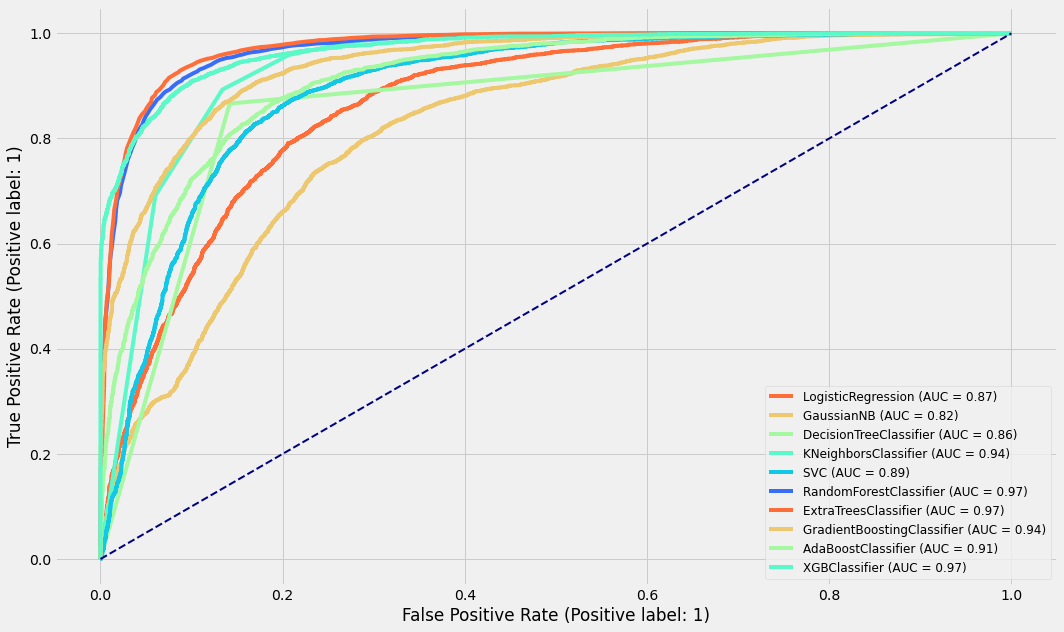

In [201]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),


# Initially Plotting the AUC ROC curve for Logistic Regression
disp=plot_roc_curve(ht_model,x_test,y_test)  

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of DecisionTreeClassifier
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_) 

plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)

plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[4][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[8][1],x_test,y_test,ax=disp.ax_)


plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':12},loc='lower right')
plt.show()

# Observations:

In [202]:
# Many models are performing well.

# RandomForestClassifier, ExtraTreesClassifier and XGBClassifier are the best one among all models from this plot based on AUC ROC score

# LogisticRegression is the best model based on the least difference between model accuracy score & cross validation score
#and also based on good AUC ROC score.

# Hence saving LogisticRegression as the final model for deployment


# Model Saving



In [203]:
# saving the LogisticRegression model

import pickle
filename='FD-subscription-model.pkl'
pickle.dump(lr, open(filename,'wb'))

# Importing test.csv

In [206]:
dft=pd.read_csv("termdeposit_test.csv")
dft





,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [207]:
# Checking the dimensions of the dataset
print('No. of Rows :',dft.shape[0])
print('No. of Columns :', dft.shape[1])

No. of Rows : 13564
No. of Columns : 17


In [208]:
# Sorting the columns based on the datatype
dft.columns.to_series().groupby(dft.dtypes).groups


{int64: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']}

In [209]:
# Getting count of different datatypes of the dataframe
dft.dtypes.value_counts()

object    9
int64     8
dtype: int64

# Data Integrity Check

In [210]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

dft.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

# Duplicate Values Check

In [211]:
dft.duplicated().sum()

0

In [212]:
duplicate = dft[dft.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome


In [213]:
# Dropping columns "poutcome", "ID", "day","month","age","default","contact" similar to train data set
# as test dataset will be used to predcit target using the model trained from train dataset, 
#hence no. of columns should be same between train and test datasets



In [214]:
dft.drop(["poutcome", "ID", "day","month","age","default","contact"],axis=1,inplace=True)
dft.head(5)

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,services,married,secondary,118,yes,no,20,6,-1,0
1,retired,divorced,primary,2787,no,no,372,1,-1,0
2,self-employed,single,tertiary,144,yes,no,676,1,-1,0
3,services,single,primary,3777,yes,no,65,2,-1,0
4,blue-collar,divorced,secondary,-705,no,yes,111,1,-1,0


# Start with Enlisting Value counts & Sub-categories of different categorial features available

In [215]:
dft_categorical=['job', 'marital', 'education', 'housing', 'loan']

for i in dft_categorical:
    length=dft[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    print('\033[1m'+i,'"Values Count"'+'\033[0m')
    for j in range(length):
        name.append(dft[i].value_counts().index.values[j])
        value_count.append((dft[i].value_counts())[j])
        percent_value_count.append(round(((dft[i].value_counts())[j])*100/(dft[i].value_counts().sum()),1))
    dft_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(dft_value_count)
    print("="*100)

job "Values Count"


,Value,Count,% Count
0,blue-collar,2890,21.3
1,management,2819,20.8
2,technician,2290,16.9
3,admin.,1540,11.4
4,services,1251,9.2
5,retired,690,5.1
6,entrepreneur,479,3.5
7,self-employed,456,3.4
8,unemployed,398,2.9
9,housemaid,366,2.7


marital "Values Count"


,Value,Count,% Count
0,married,8119,59.9
1,single,3868,28.5
2,divorced,1577,11.6


education "Values Count"


,Value,Count,% Count
0,secondary,6978,51.4
1,tertiary,4000,29.5
2,primary,2043,15.1
3,unknown,543,4.0


housing "Values Count"


,Value,Count,% Count
0,yes,7546,55.6
1,no,6018,44.4


loan "Values Count"


,Value,Count,% Count
0,no,11451,84.4
1,yes,2113,15.6


In [216]:
# Observations:

# Columns "job"(0.6%), "education"(4.0%) have unknown values

# I am going to replace "unknown" values Nan in columns "job", "education" and "contact" 
# and will address them per null values handling

In [217]:
# Replacing unknown values in columns "job", "education" with Nan
dft["job"]=dft["job"].replace("unknown",np.nan) 
dft["education"]=dft["education"].replace("unknown",np.nan)


# Null Values Handling

In [218]:
# Checking the sum of null values for all columns

dft.isnull().sum().sum()

625

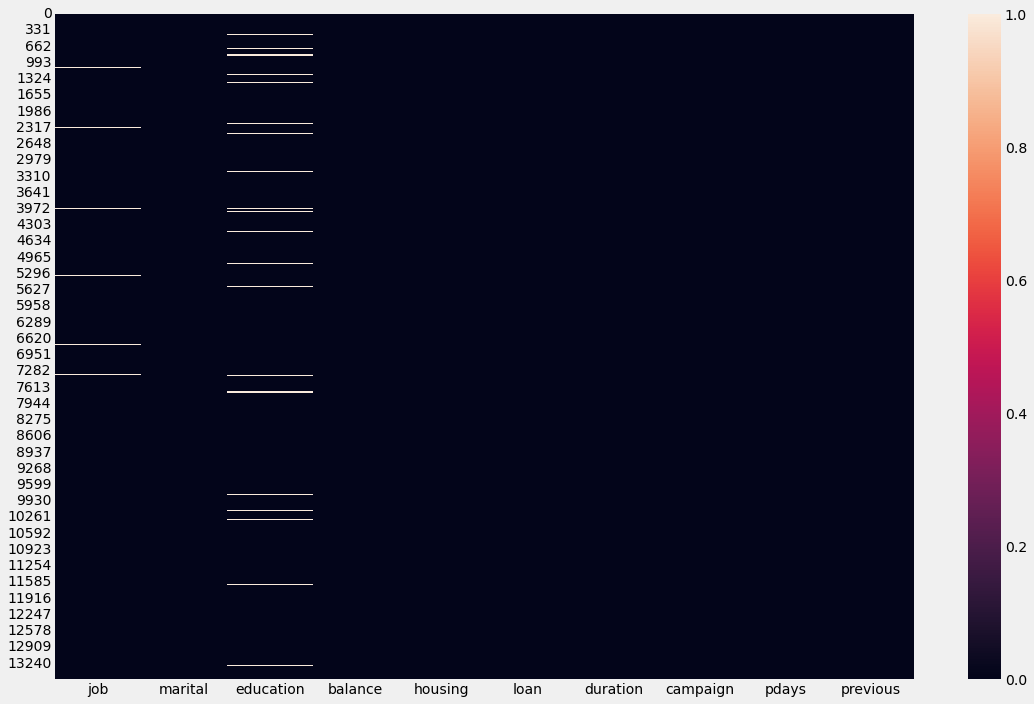

In [219]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(dft.isnull())
plt.show()

In [220]:
#Finding the percentage of data missing from the dataset
missing_values = dft.isnull().sum()
percentage_missing_values =round((missing_values/len(dft))*100,1)
dtyp=dft.dtypes
dft_null=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
dft_null.sort_values(by=["% Missing data"],ascending=False)

Missing Values


,Data Type,Missing Values,% Missing data
education,object,543,4.0
job,object,82,0.6
marital,object,0,0.0
balance,int64,0,0.0
housing,object,0,0.0
loan,object,0,0.0
duration,int64,0,0.0
campaign,int64,0,0.0
pdays,int64,0,0.0
previous,int64,0,0.0


In [221]:
# Observation:

# Null values are present in "job", "education" columns.

# As the data is categorical in nature, I will use 'mode' to replace null values.

# Missing Values Imputation

In [222]:
# Filling null values of column with categorical data with first value of 'mode'
for i in dft.columns:
    if (dft[i].dtype=='O' and dft[i].isnull().sum()!=0):
        dft[i]=dft[i].fillna(dft[i].mode()[0])

print(dft.isnull().sum().sum())

0


In [223]:
dft.head(5)

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,services,married,secondary,118,yes,no,20,6,-1,0
1,retired,divorced,primary,2787,no,no,372,1,-1,0
2,self-employed,single,tertiary,144,yes,no,676,1,-1,0
3,services,single,primary,3777,yes,no,65,2,-1,0
4,blue-collar,divorced,secondary,-705,no,yes,111,1,-1,0


# Encoding of categorical features of test data

In [224]:
# Using Label Encoder to encode the data

In [225]:
# Sorting the columns based on the datatype
dft.columns.to_series().groupby(dft.dtypes).groups

{int64: ['balance', 'duration', 'campaign', 'pdays', 'previous'], object: ['job', 'marital', 'education', 'housing', 'loan']}

In [227]:
dft_categorical=['job', 'marital', 'education', 'housing', 'loan']

In [228]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in dft_categorical:
    dft[i] = le.fit_transform(dft[i])
dft.head()

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous
0,7,1,1,118,1,0,20,6,-1,0
1,5,0,0,2787,0,0,372,1,-1,0
2,6,2,2,144,1,0,676,1,-1,0
3,7,2,0,3777,1,0,65,2,-1,0
4,1,0,1,-705,0,1,111,1,-1,0


# Prediction of test dataset using final model

In [229]:
loaded_model=pickle.load(open('FD-subscription-model.pkl','rb'))
pred = loaded_model.predict(dft)
prediction = [round(i) for i in pred]

In [230]:
loaded_model.score(dft,pred)*100

100.0

In [231]:
test_data_prediction=pd.DataFrame({"Predicted_Subscribed":prediction})
test_data_prediction

,Predicted_Subscribed
0,1
1,1
2,1
3,1
4,0
...,...
13559,1
13560,1
13561,1
13562,1


In [232]:
final_test_data = pd.concat([dft, test_data_prediction], axis=1)
final_test_data.head()

,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,Predicted_Subscribed
0,7,1,1,118,1,0,20,6,-1,0,1
1,5,0,0,2787,0,0,372,1,-1,0,1
2,6,2,2,144,1,0,676,1,-1,0,1
3,7,2,0,3777,1,0,65,2,-1,0,1
4,1,0,1,-705,0,1,111,1,-1,0,0
